In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [3]:
forcast_df         = pd.read_csv(r'C:\Users\James Stanley\Documents\GitHub\backtest_utilities\forecasts_corn_(2, 2)_True_5.csv',parse_dates=True,index_col='asofdate')
metadata_df        = pd.read_csv(r'C:\Users\James Stanley\Documents\GitHub\backtest_utilities\metadata_corn_(2, 2)_True_5.csv',parse_dates=True,index_col='asofdate')
metadatasummary_df = pd.read_csv(r'C:\Users\James Stanley\Documents\GitHub\backtest_utilities\metadatasummary_corn_arma_(2,2).csv',parse_dates=True)
pnl_df             = pd.read_csv(r'C:\Users\James Stanley\Documents\GitHub\backtest_utilities\pnl_armaspreadthreshold_corn_(2, 2)_True_5.csv',parse_dates=True,index_col='asofdate')
positions_df       = pd.read_csv(r'C:\Users\James Stanley\Documents\GitHub\backtest_utilities\positions_corn_arma_ma50_(2,2).csv',parse_dates=True,index_col='asofdate')
trade_pnl          = pd.read_csv(r'C:\Users\James Stanley\Documents\GitHub\backtest_utilities\tradelevelpnl_armaspreadthreshold_corn_(2, 2)_True_5.csv',parse_dates=True,index_col='asofdate') 
performance_df     = pd.read_csv(r'C:\Users\James Stanley\Documents\GitHub\backtest_utilities\tradeperformance_corn_arma_ma50_(2,2).csv',parse_dates=True)

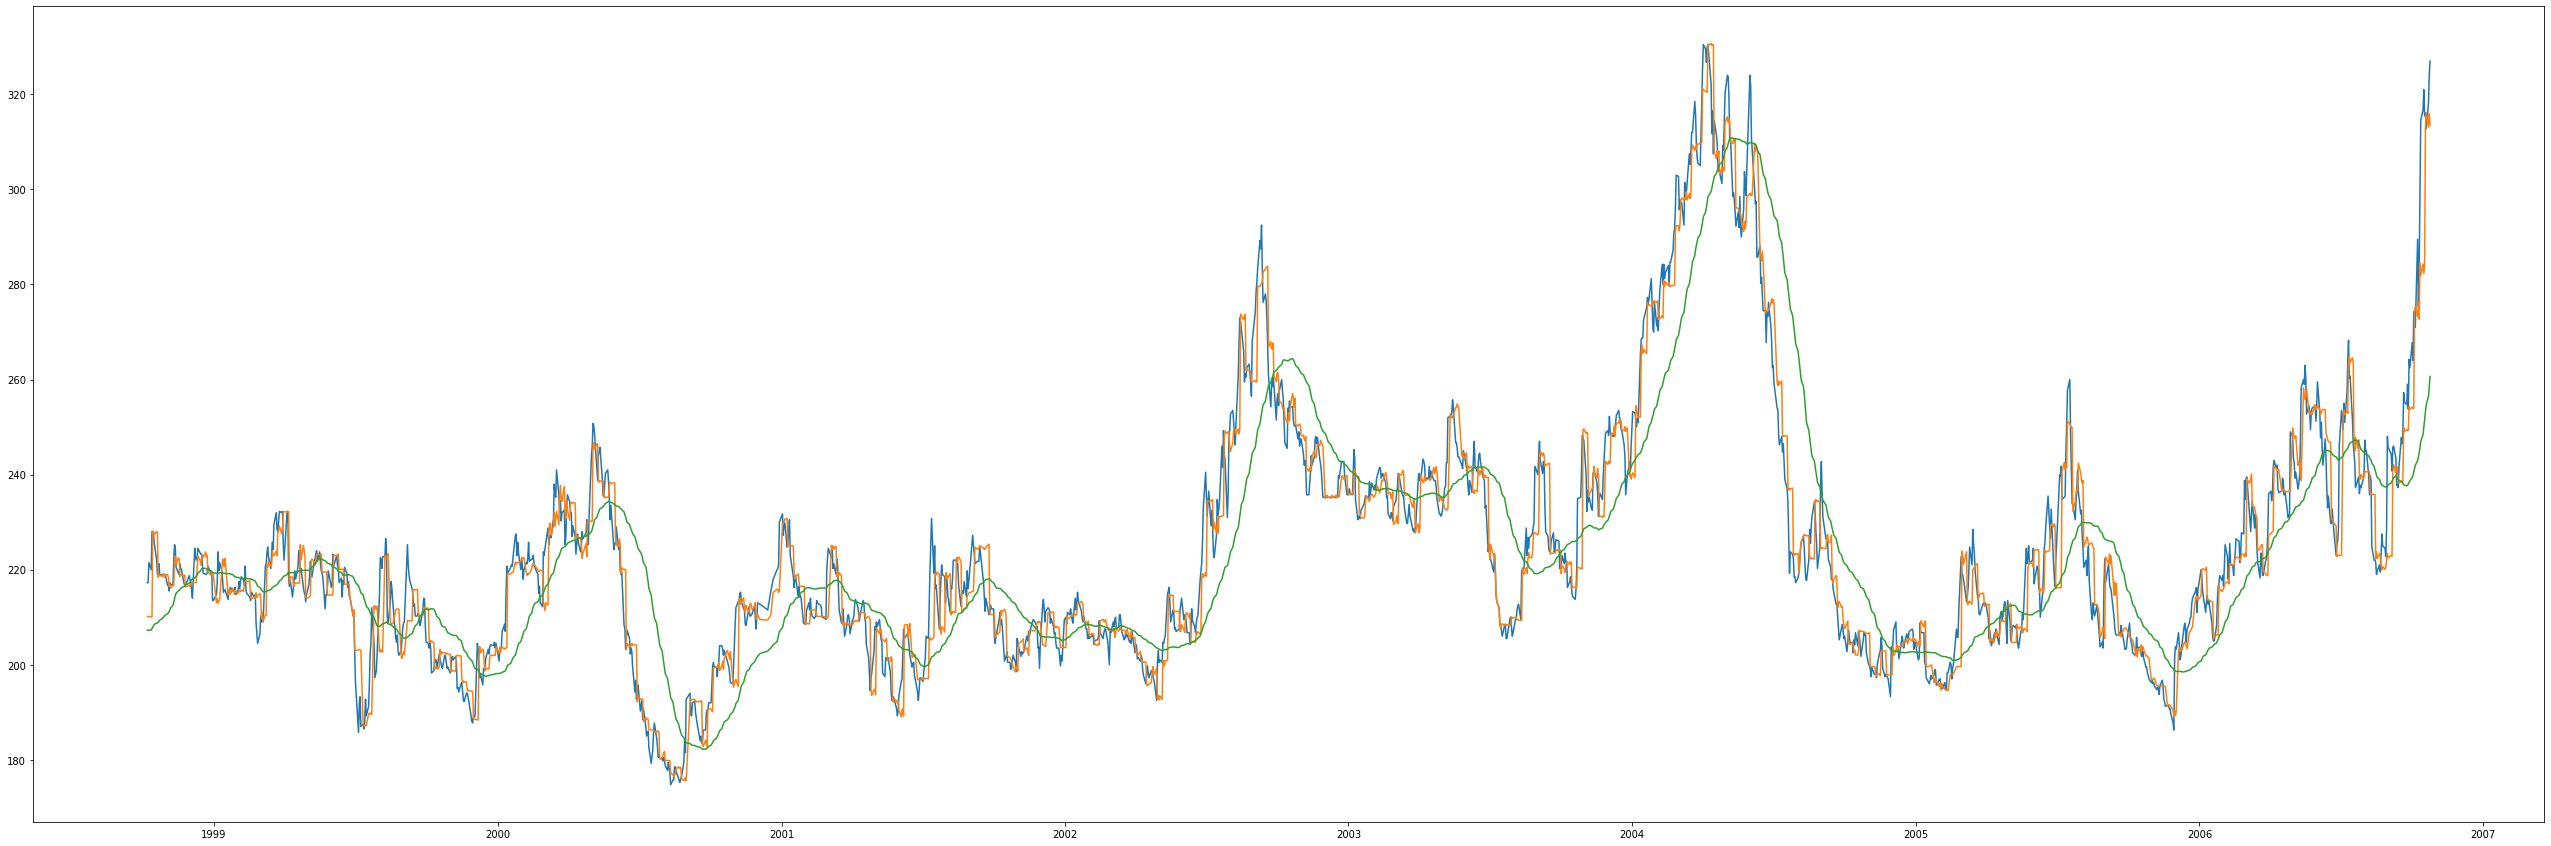

In [4]:
plt.figure(figsize=(45,15))

plt.plot(forcast_df['close'][7000:9000])
plt.plot(forcast_df['pointForecast'][7000:9000])
plt.plot(forcast_df['MA_50'][7000:9000])

plt.show()

   Unnamed: 0  No._Trades  relative_Pnl  Hit_Rate  Minimum  Maximum      Mean  \
0           0        1074    404.806061  0.975791    -3.75     89.0  7.754655   

    Variance   Std_Dev      Skew   Kurtosis  
0  79.236943  8.901514  3.381559  18.826548  


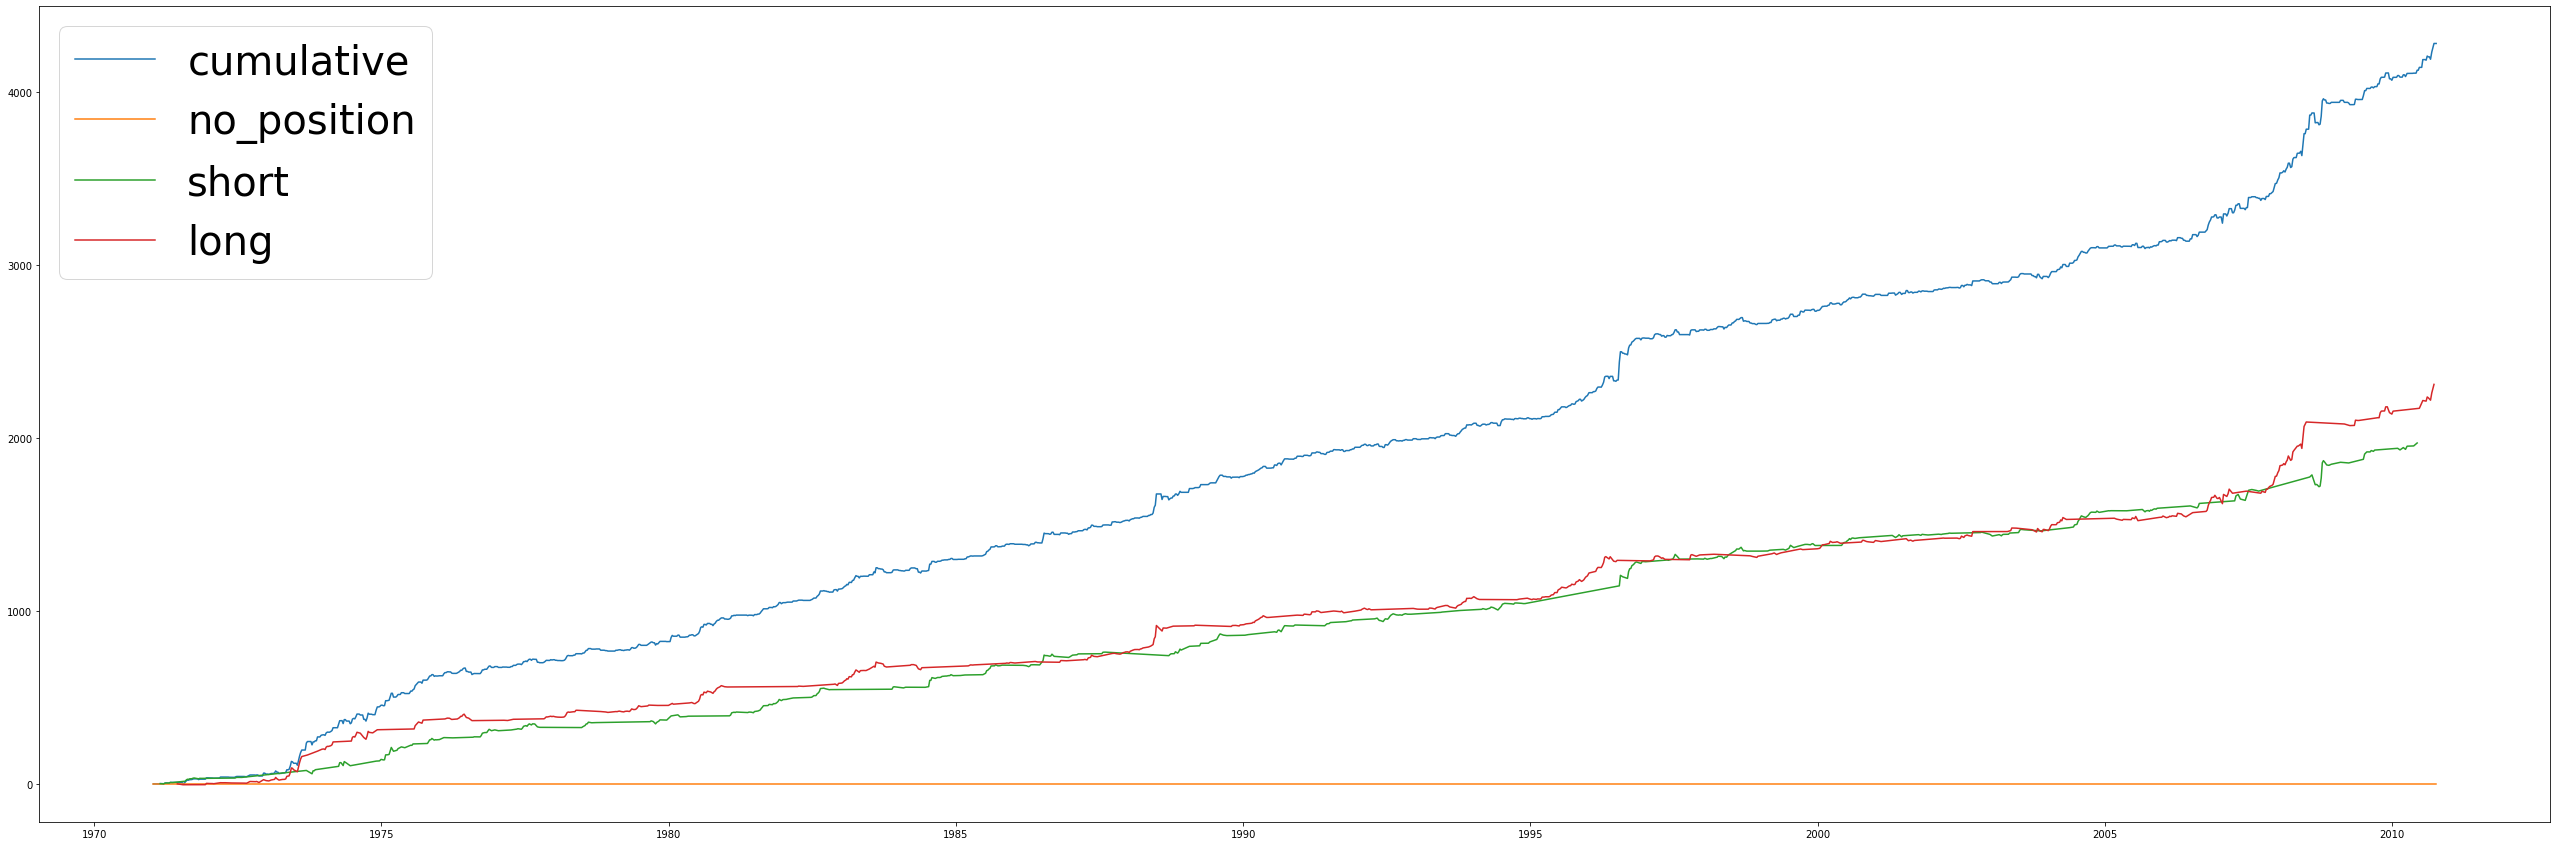

In [5]:
print(performance_df)

plt.figure(figsize=(45,15))

plt.plot(trade_pnl['pnl'].cumsum())

plt.plot(trade_pnl[trade_pnl['positionType'] == 'no_position']['pnl'].cumsum())
plt.plot(trade_pnl[trade_pnl['positionType'] == 'short']['pnl'].cumsum())
plt.plot(trade_pnl[trade_pnl['positionType'] == 'long']['pnl'].cumsum())

plt.legend(['cumulative','no_position','short','long'],fontsize=40)

plt.show()


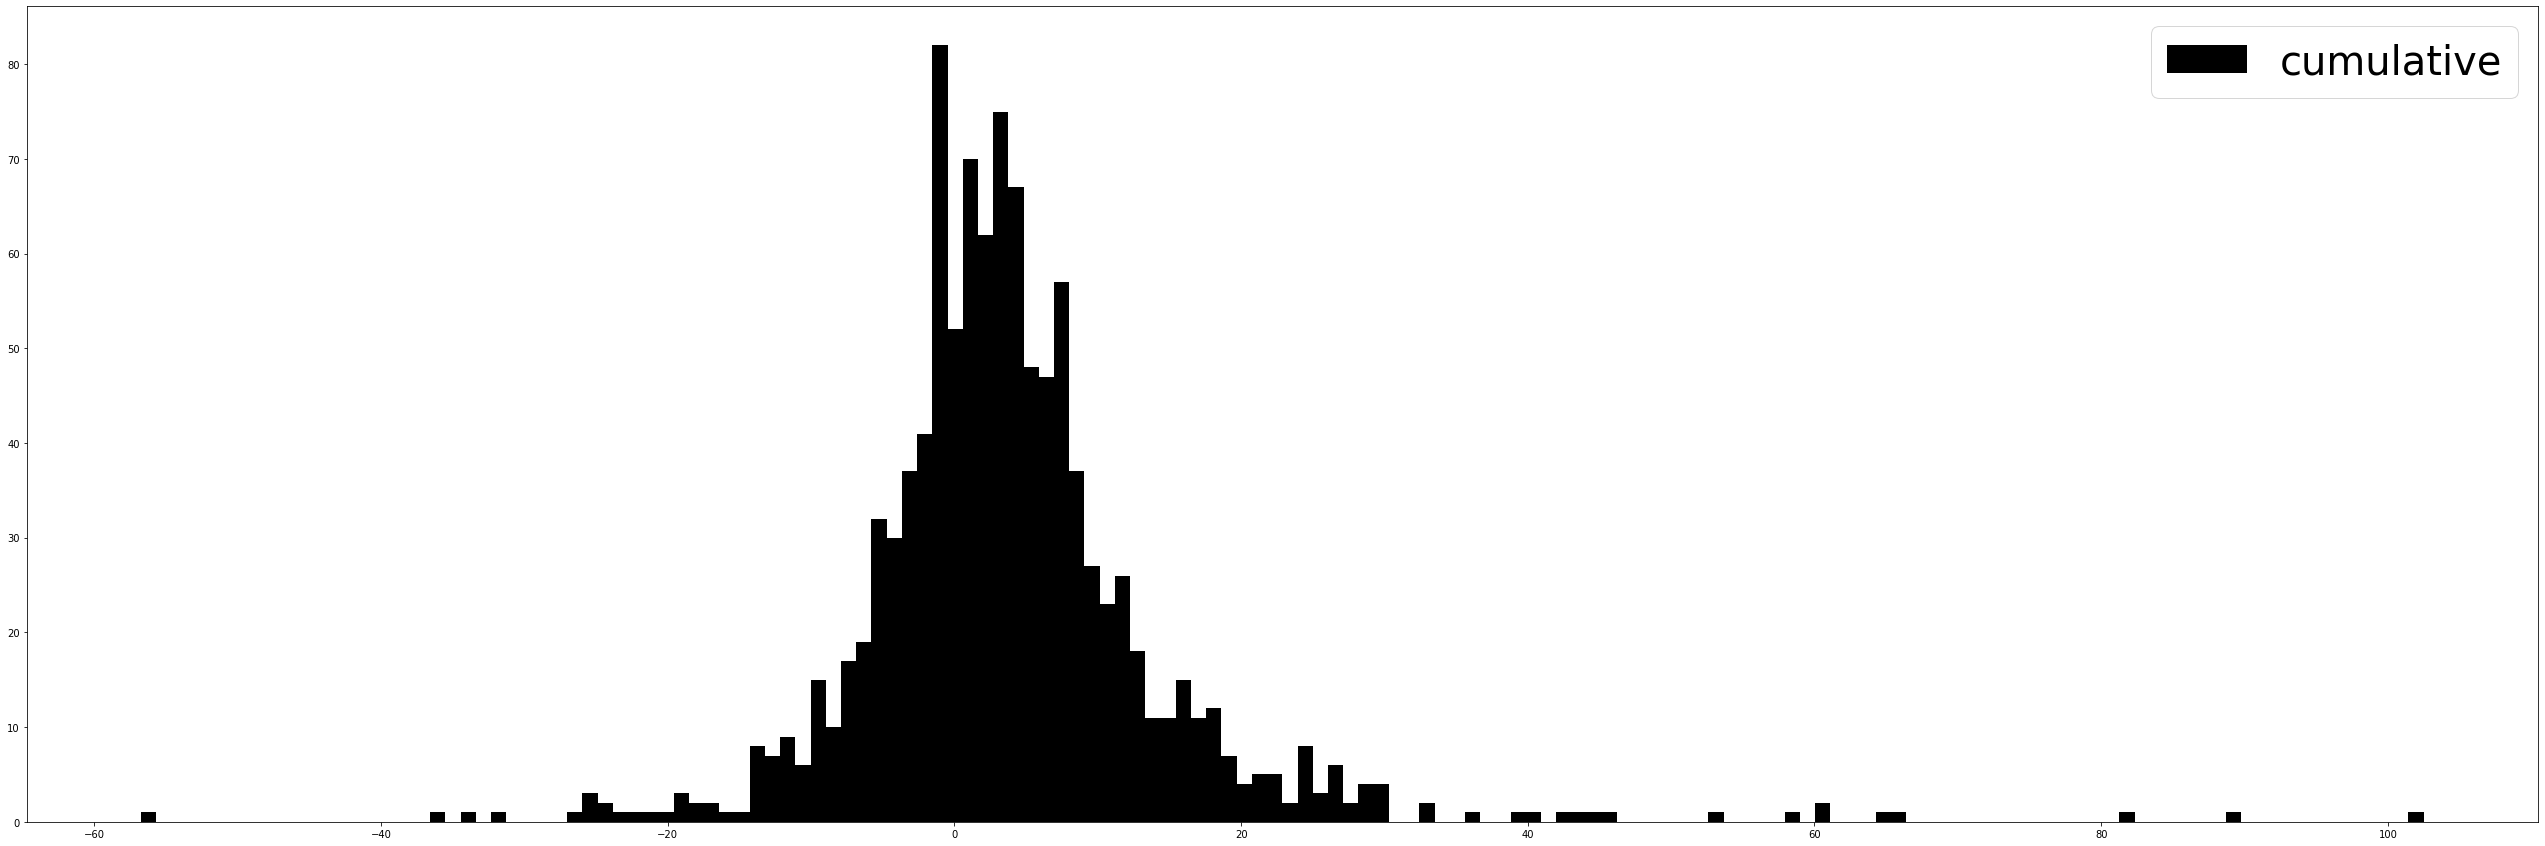

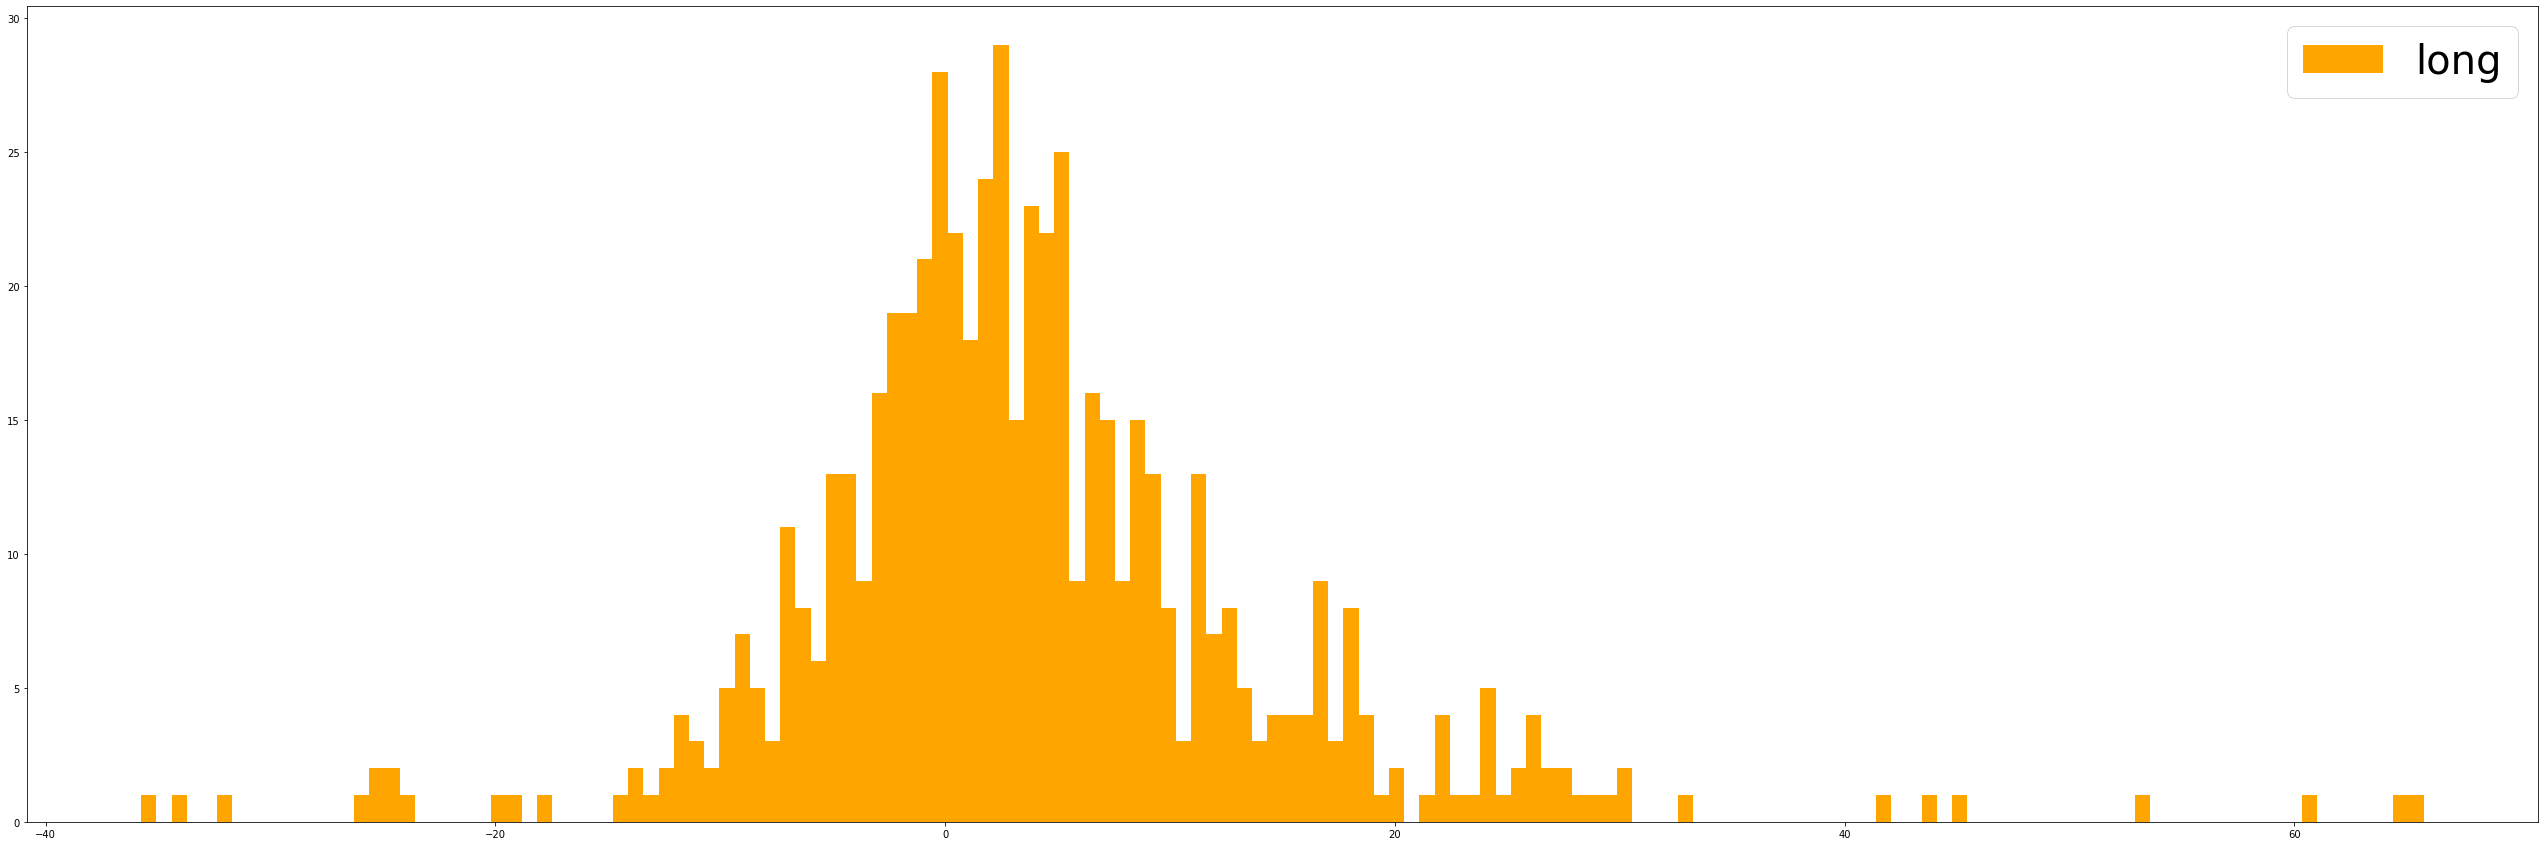

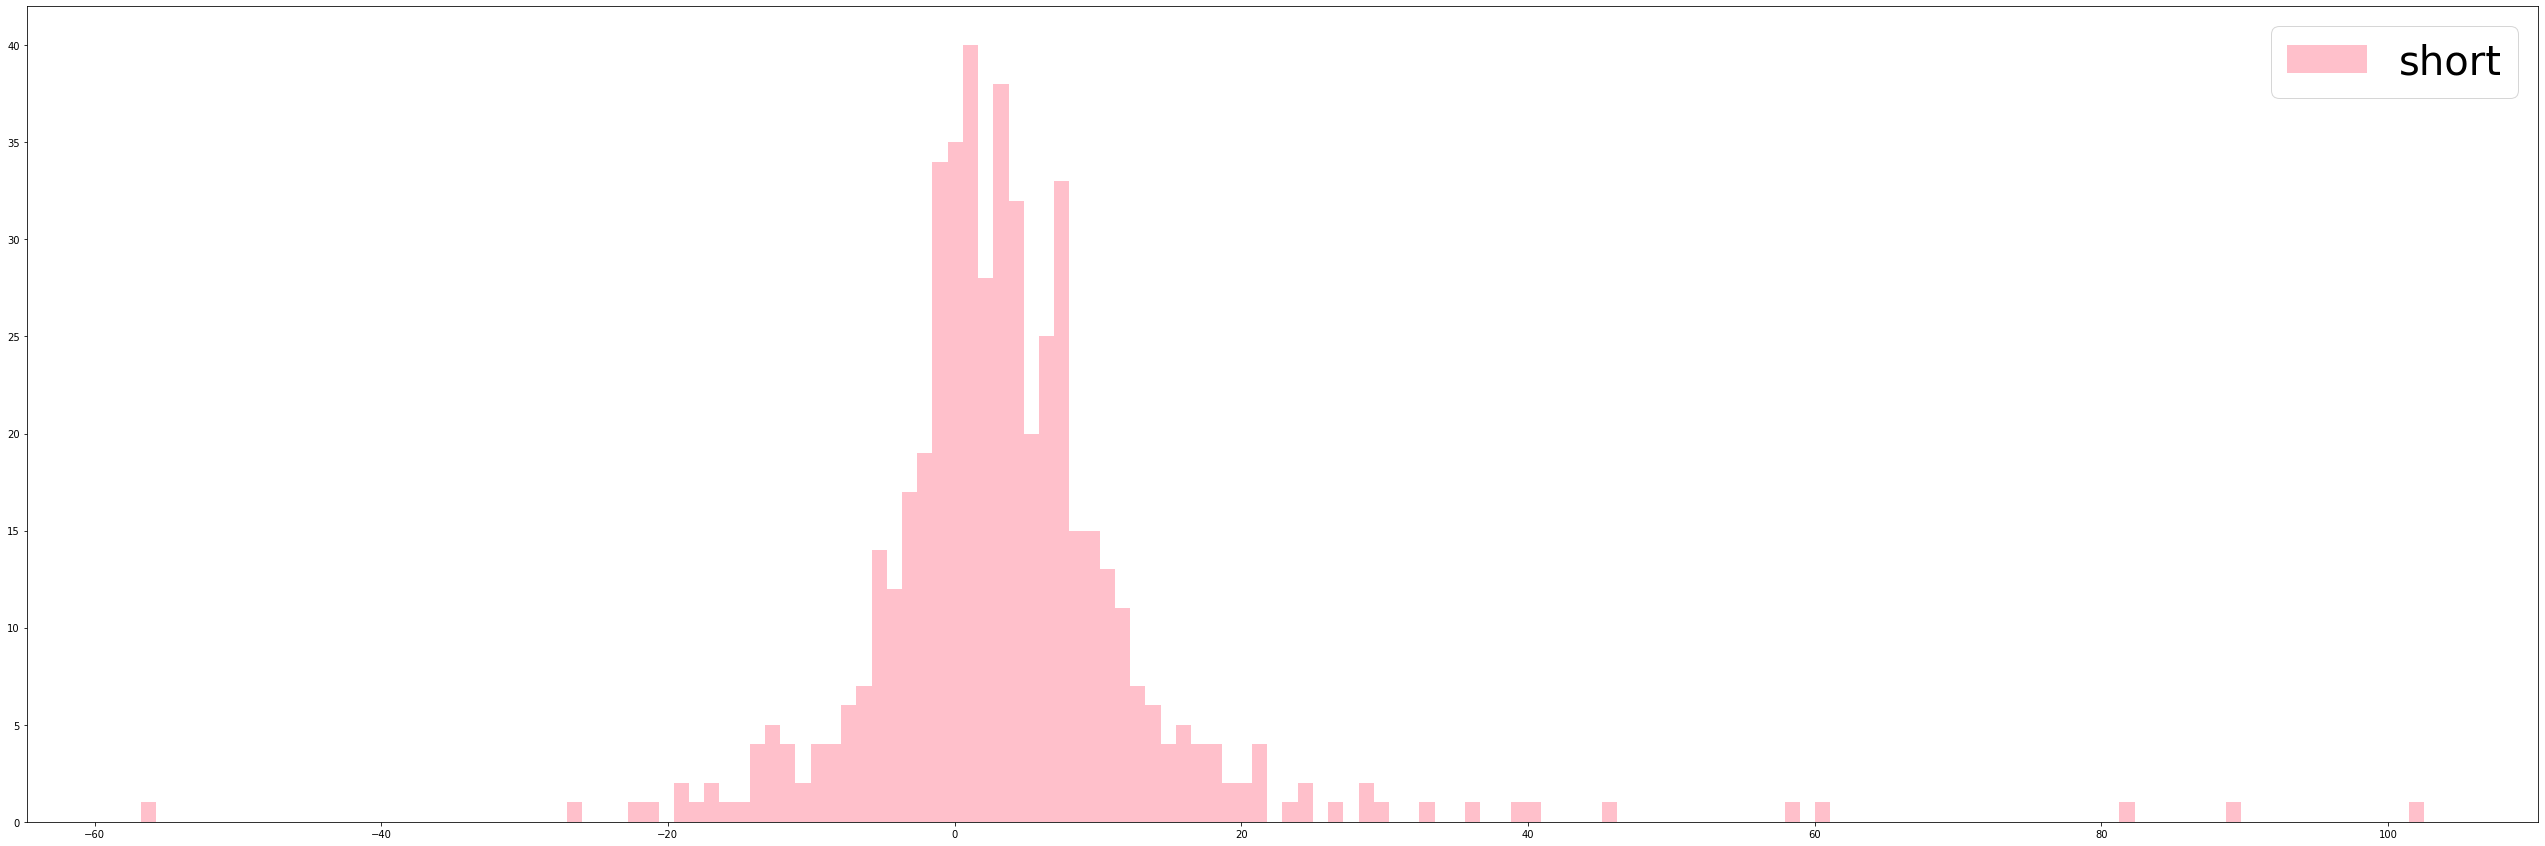

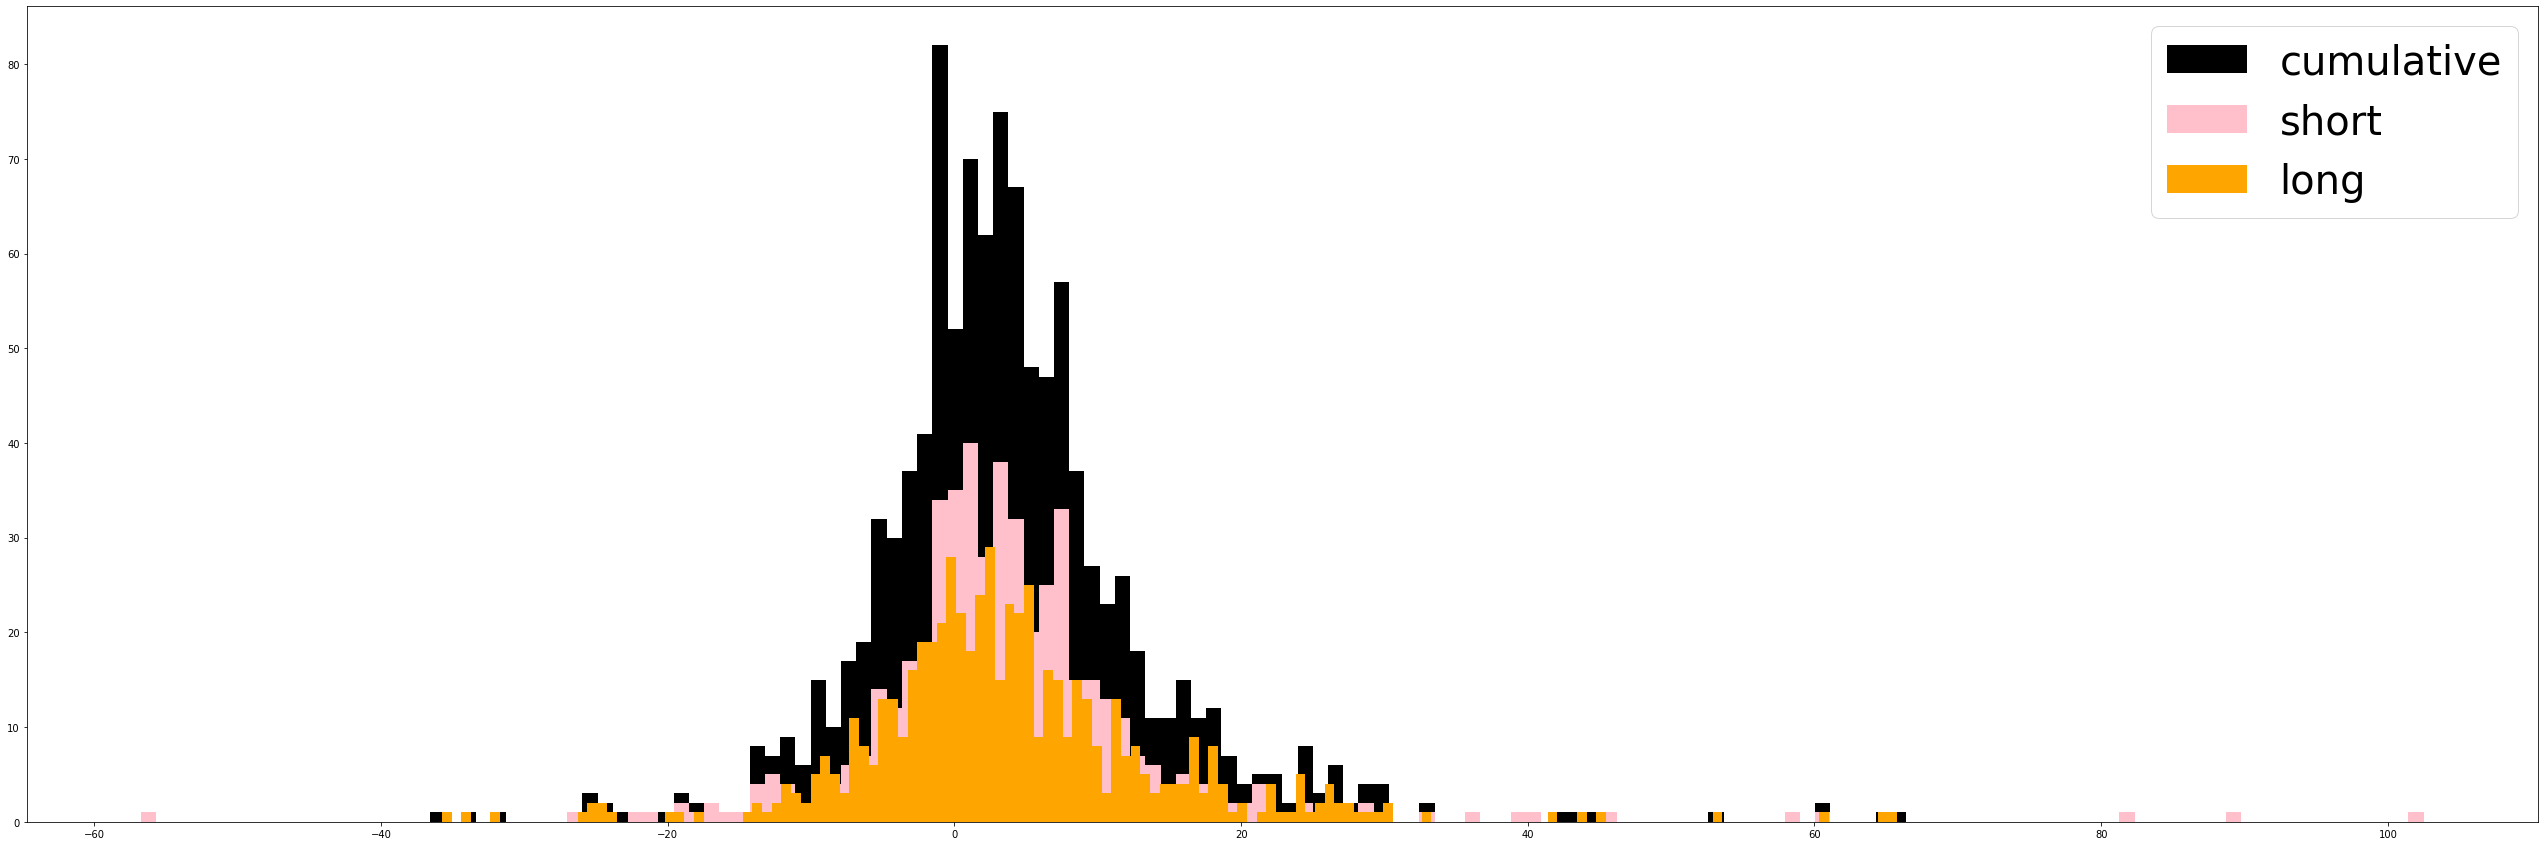

In [6]:
# Cumulative
plt.figure(figsize=(45,15))

plt.hist(trade_pnl[trade_pnl['pnl'] != 0]['pnl'],color='black',bins=150)

plt.legend(['cumulative'],fontsize=40)

plt.show()

# Short
plt.figure(figsize=(45,15))

plt.hist(trade_pnl[trade_pnl['positionType'] == 'long']['pnl'],color='orange',bins=150)

plt.legend(['long'],fontsize=40)

plt.show()

# Long
plt.figure(figsize=(45,15))

plt.hist(trade_pnl[trade_pnl['positionType'] == 'short']['pnl'],color='pink',bins=150)

plt.legend(['short'],fontsize=40)

plt.show()

# Compare all
plt.figure(figsize=(45,15))
plt.hist(trade_pnl[trade_pnl['pnl'] != 0]['pnl'],color='black',bins=150)

plt.hist(trade_pnl[trade_pnl['positionType'] == 'short']['pnl'],color='pink',bins=150)
plt.hist(trade_pnl[trade_pnl['positionType'] == 'long']['pnl'],color='orange',bins=150)

plt.legend(['cumulative','short','long'],fontsize=40)

plt.show()

# Pnl vs. Price

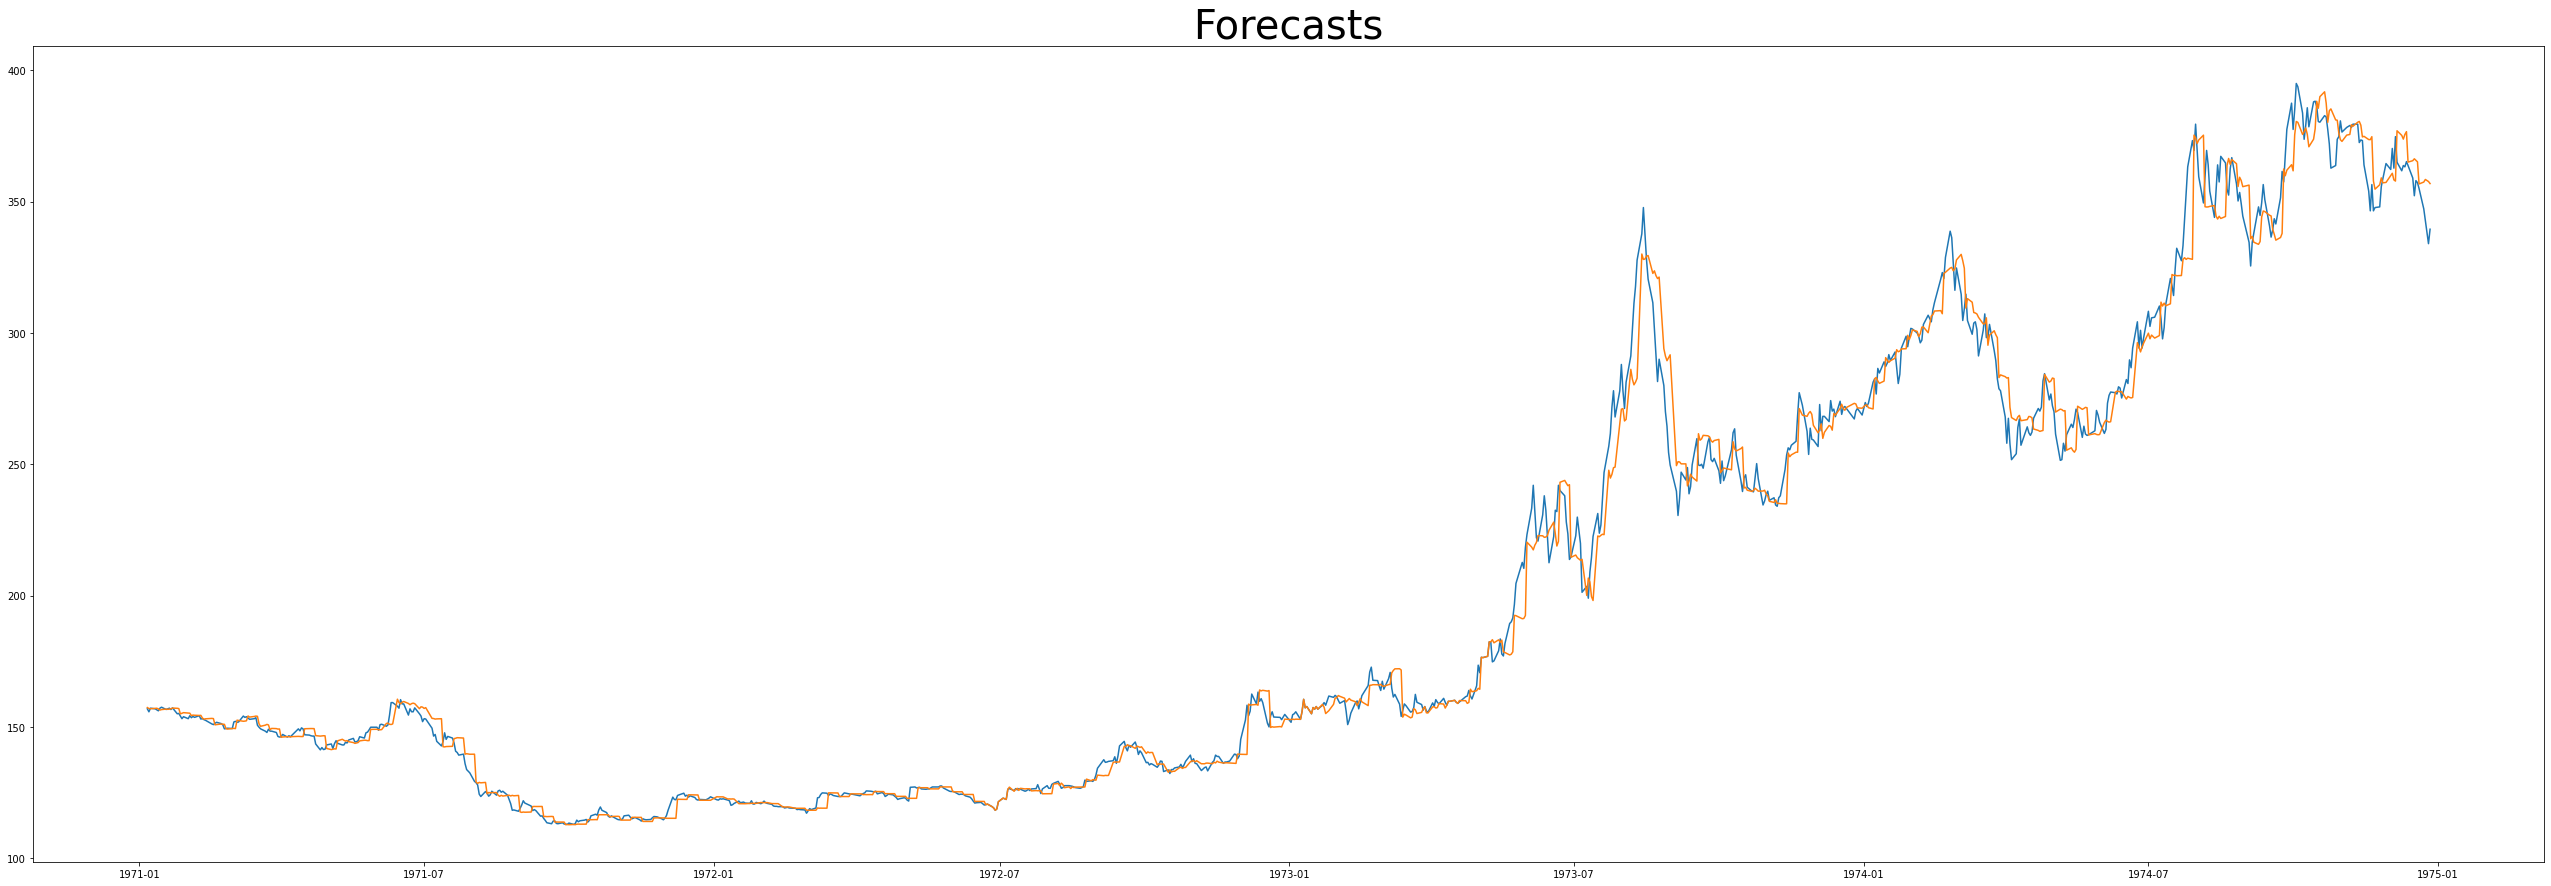

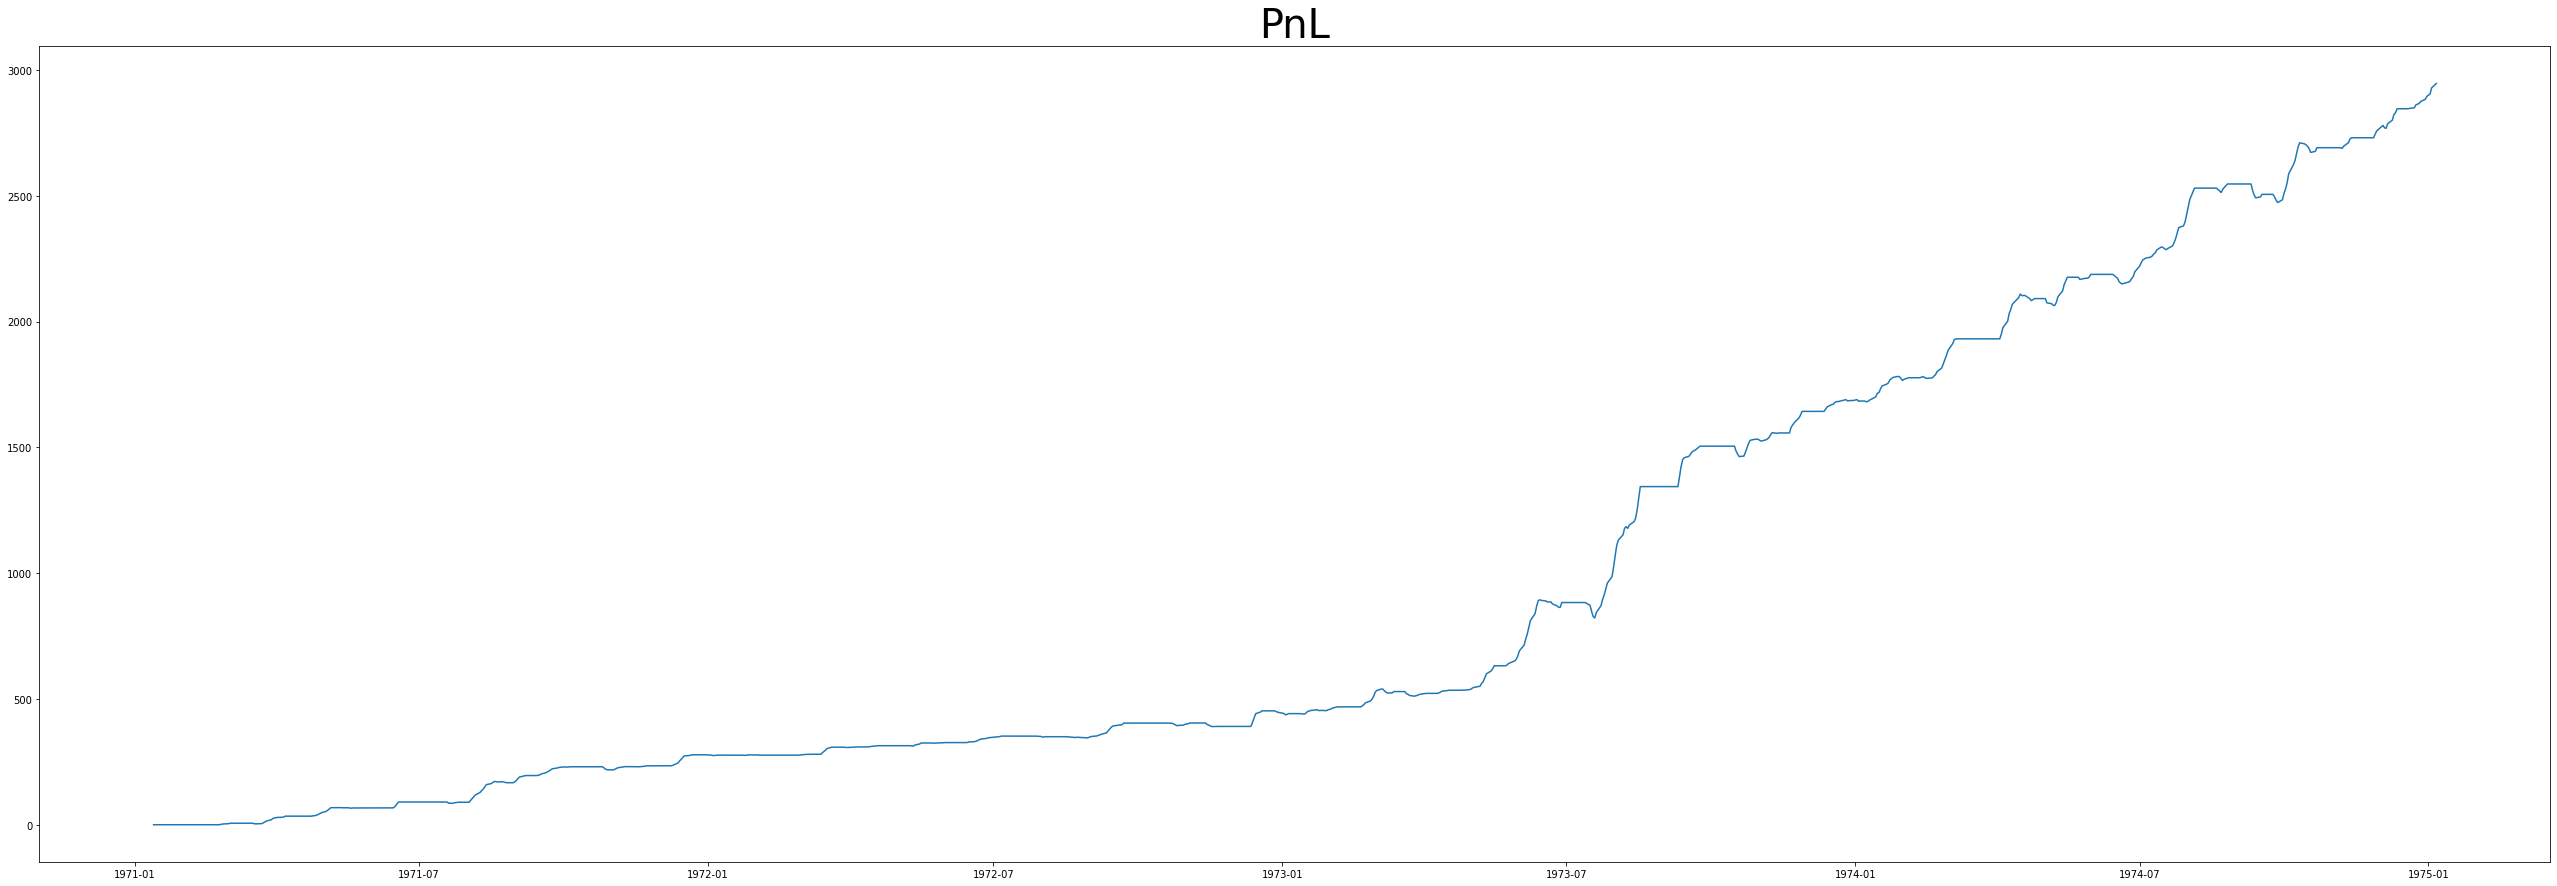

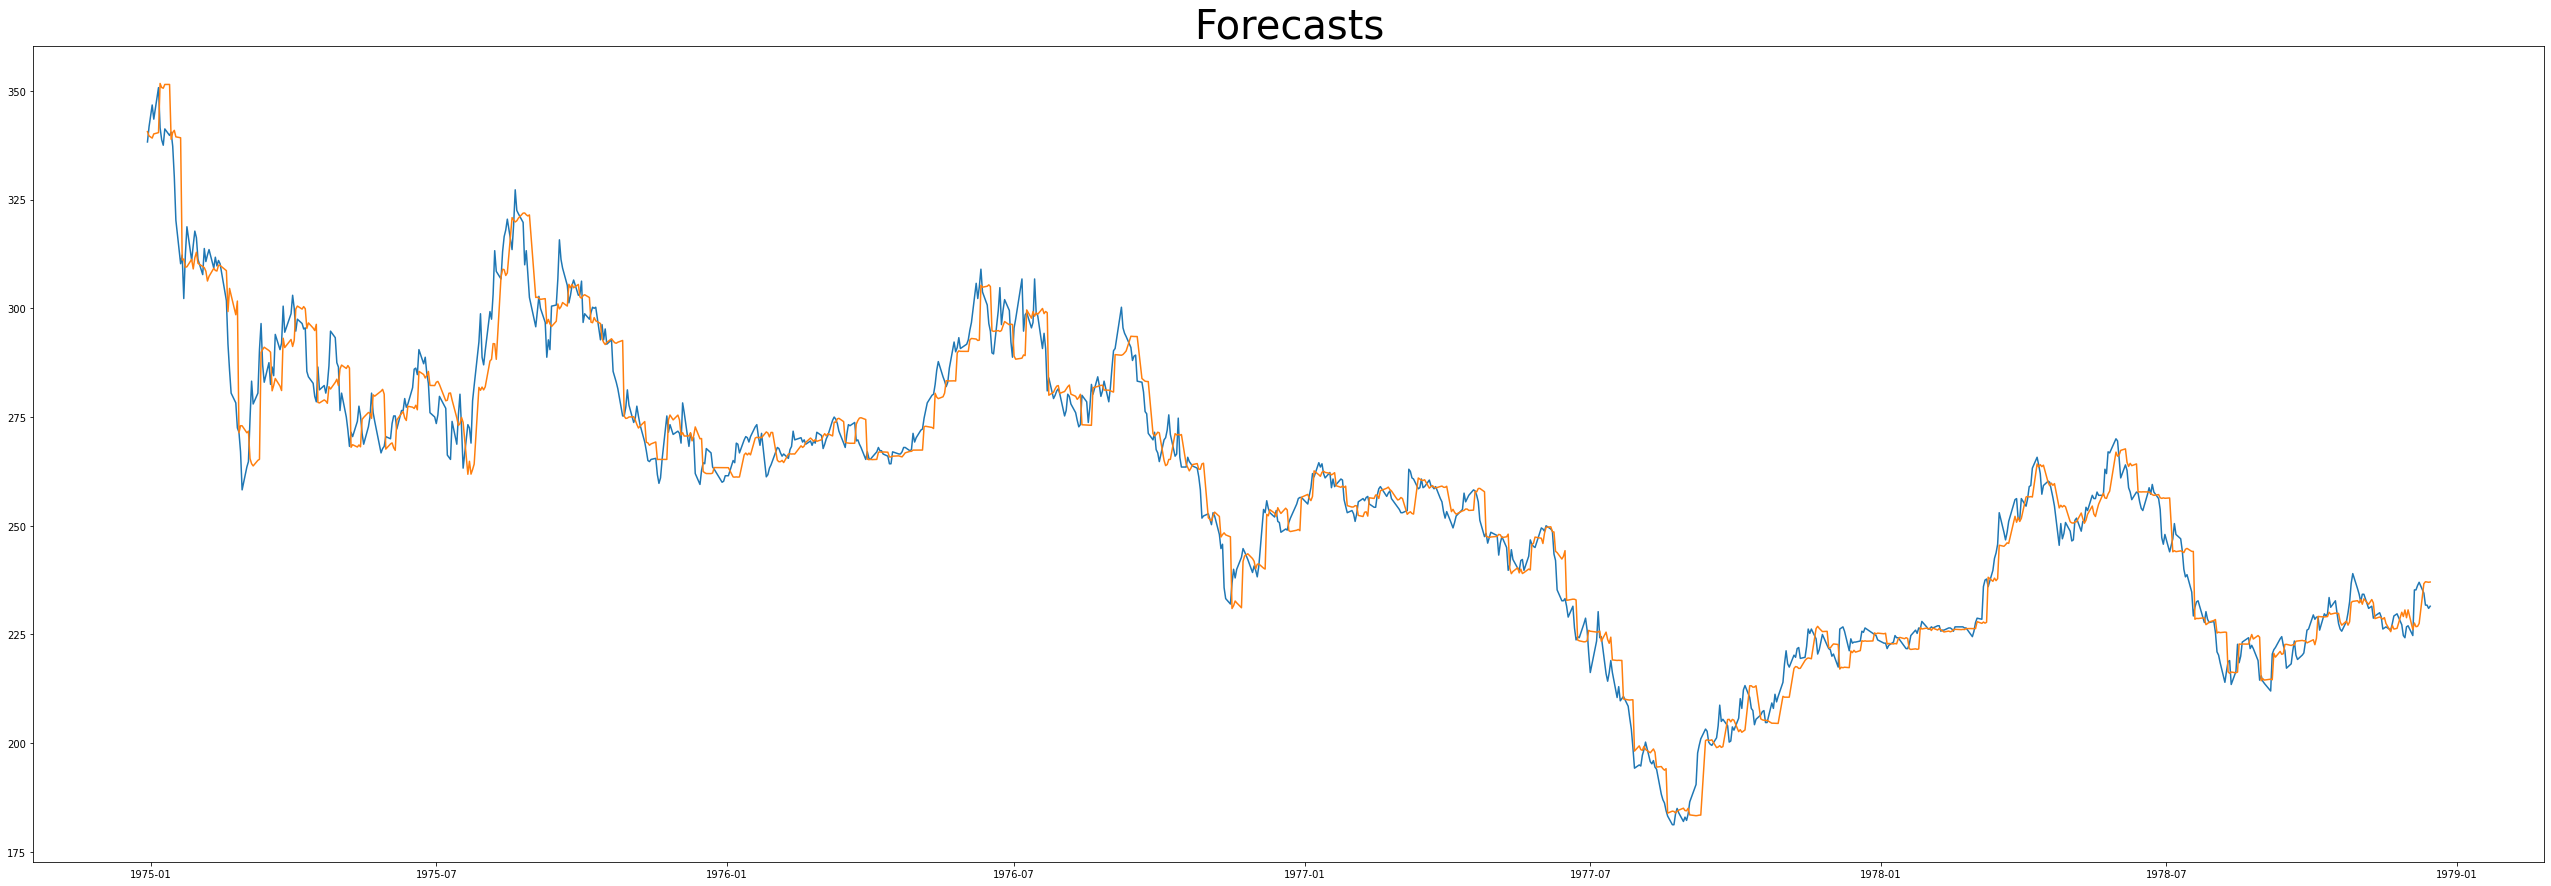

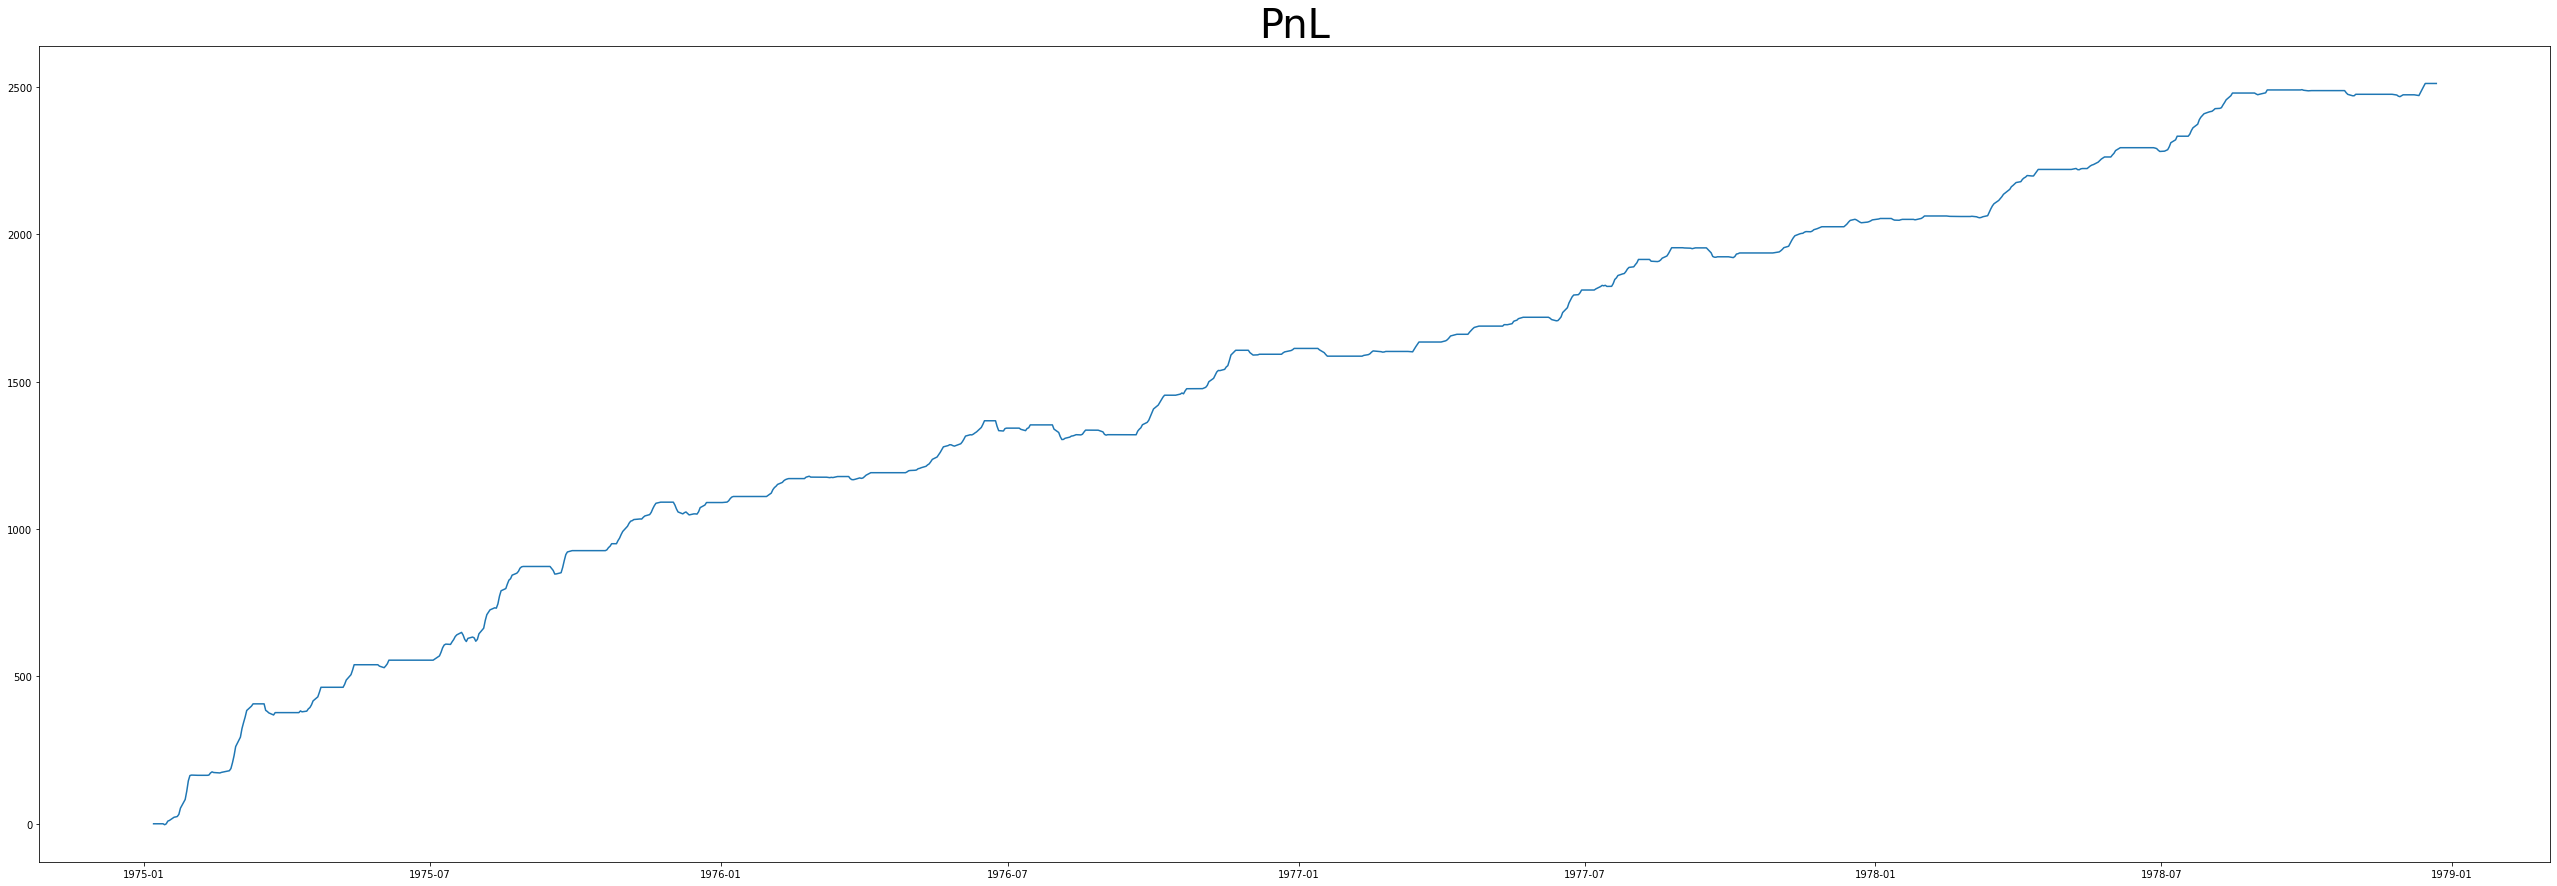

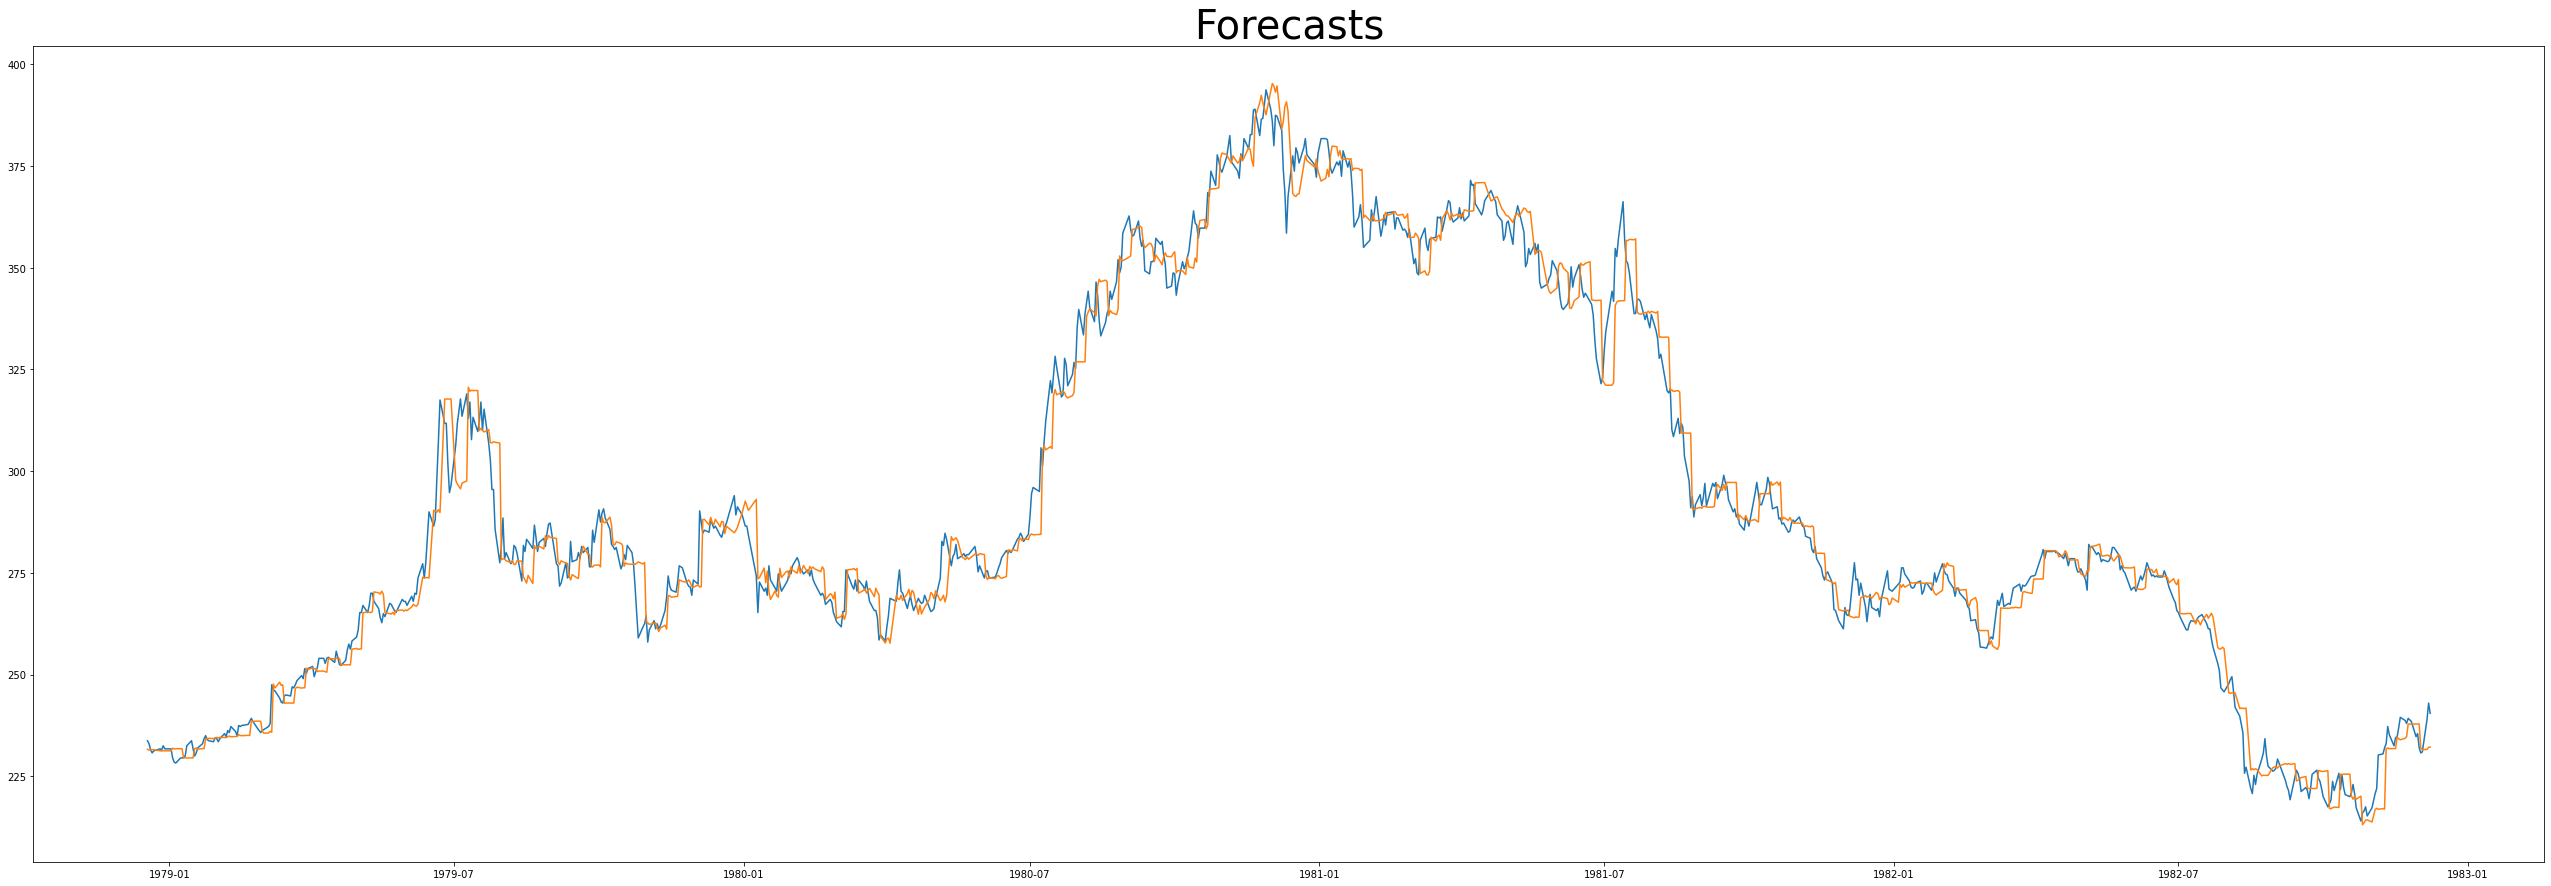

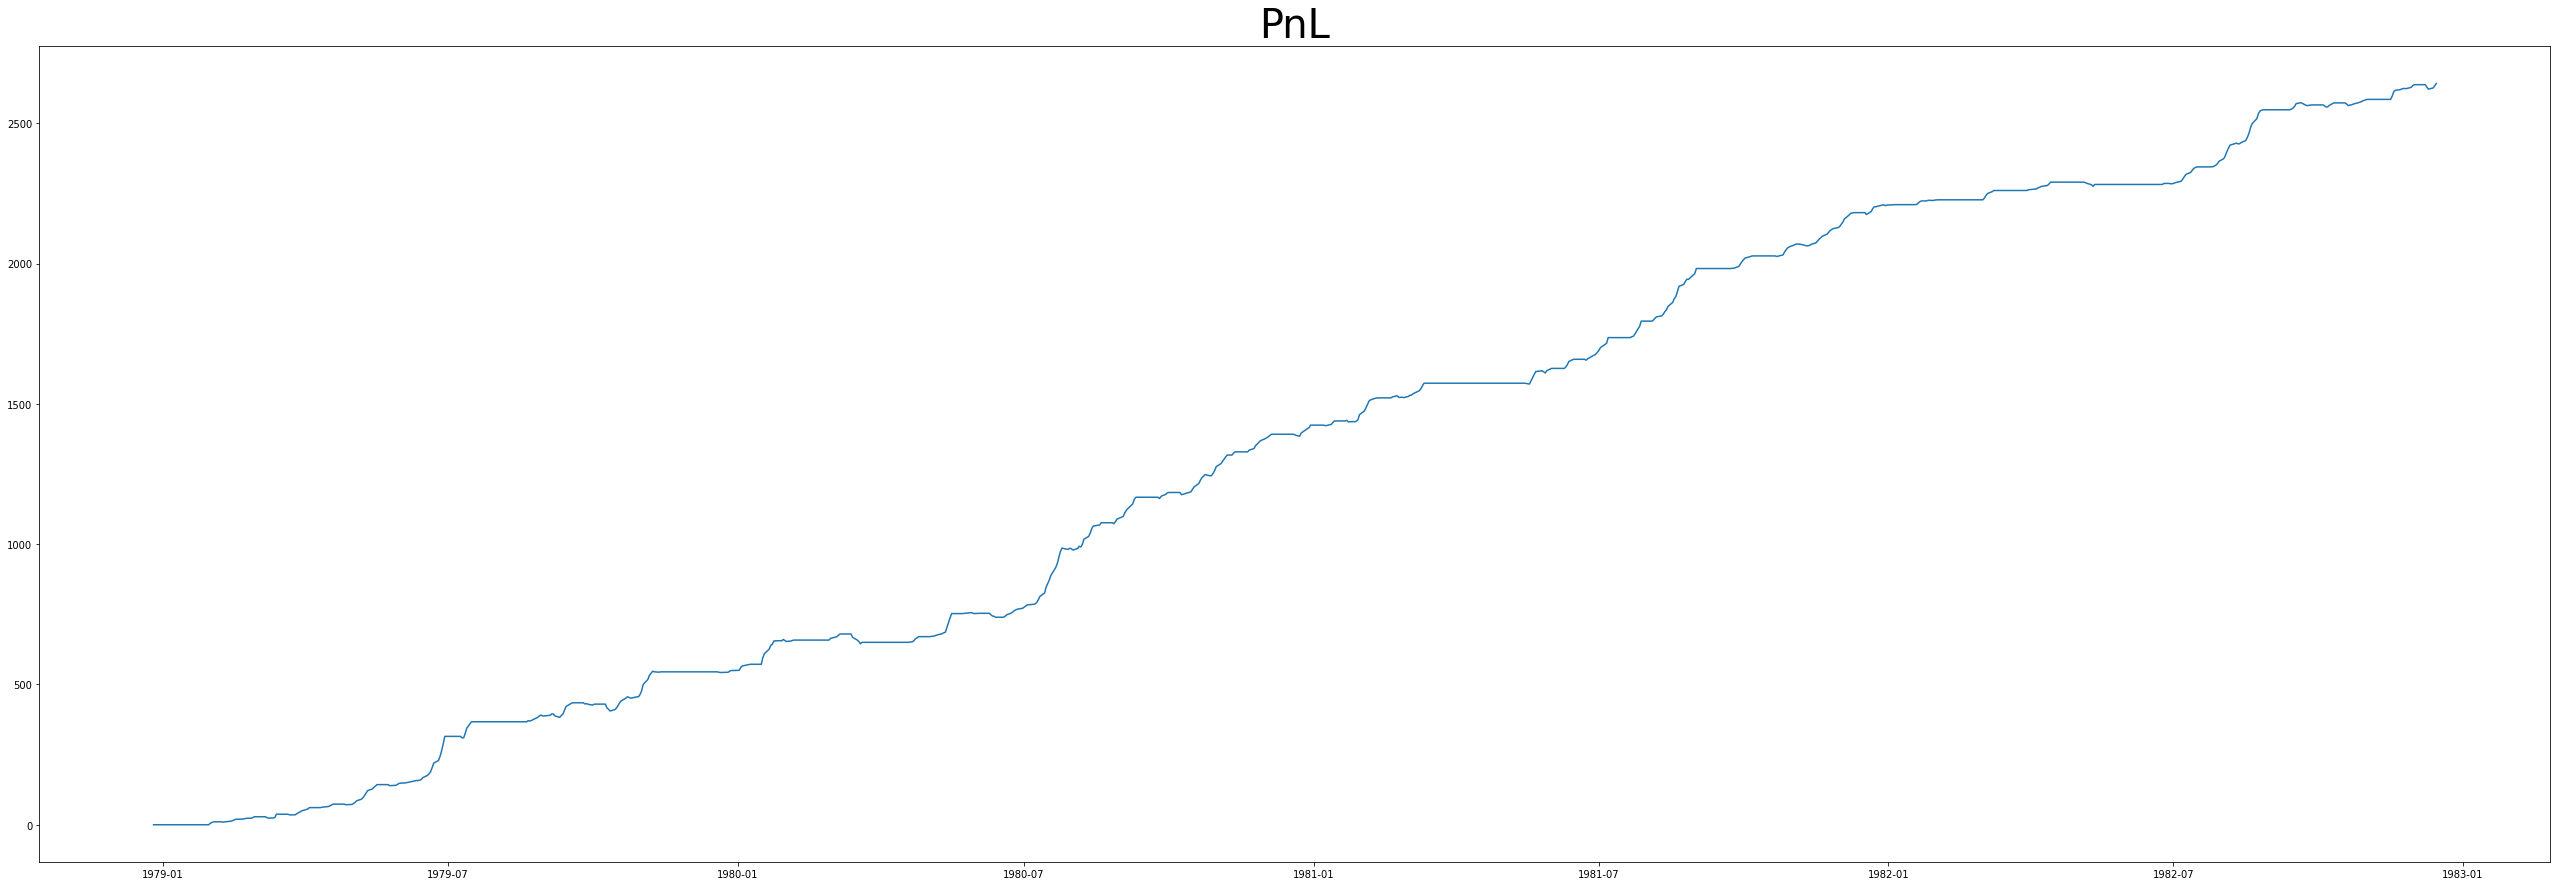

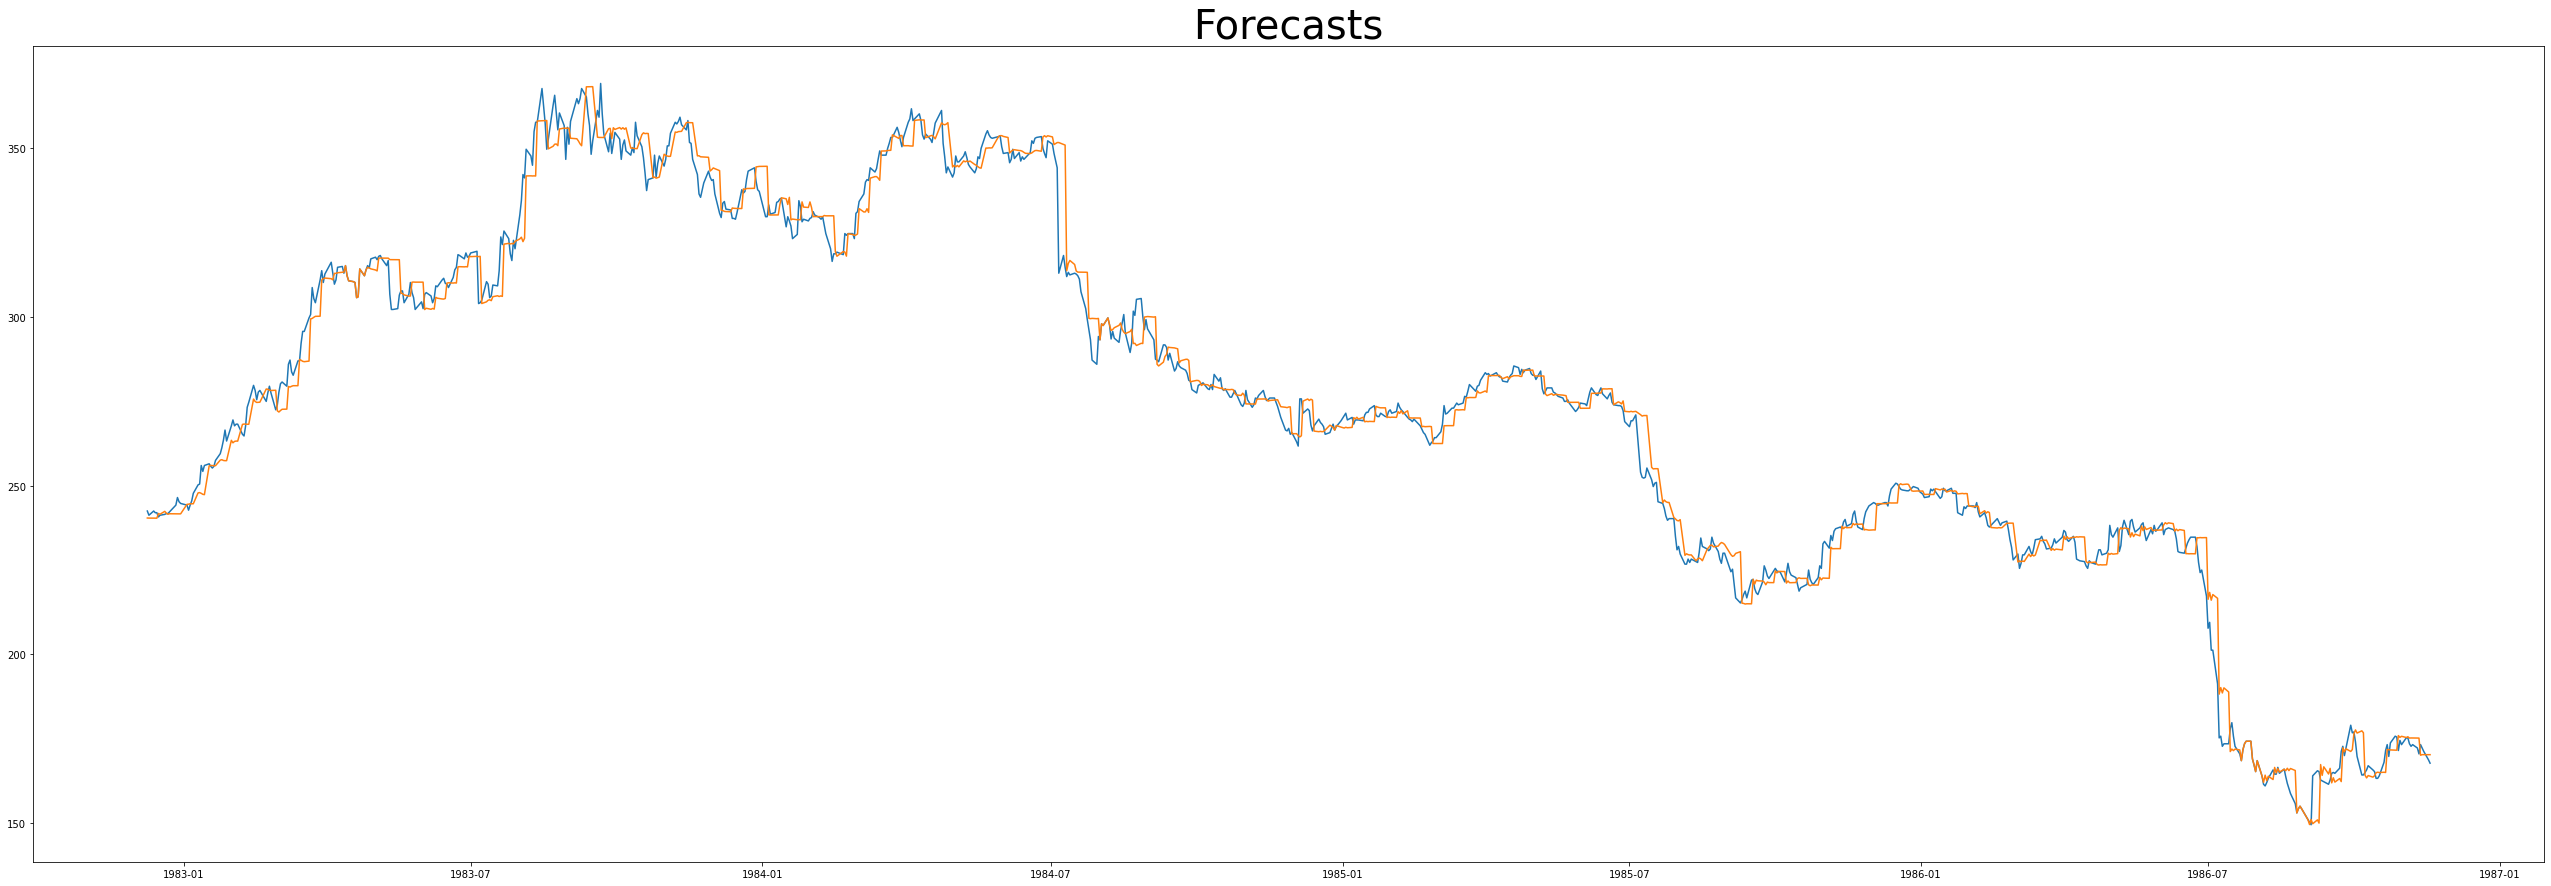

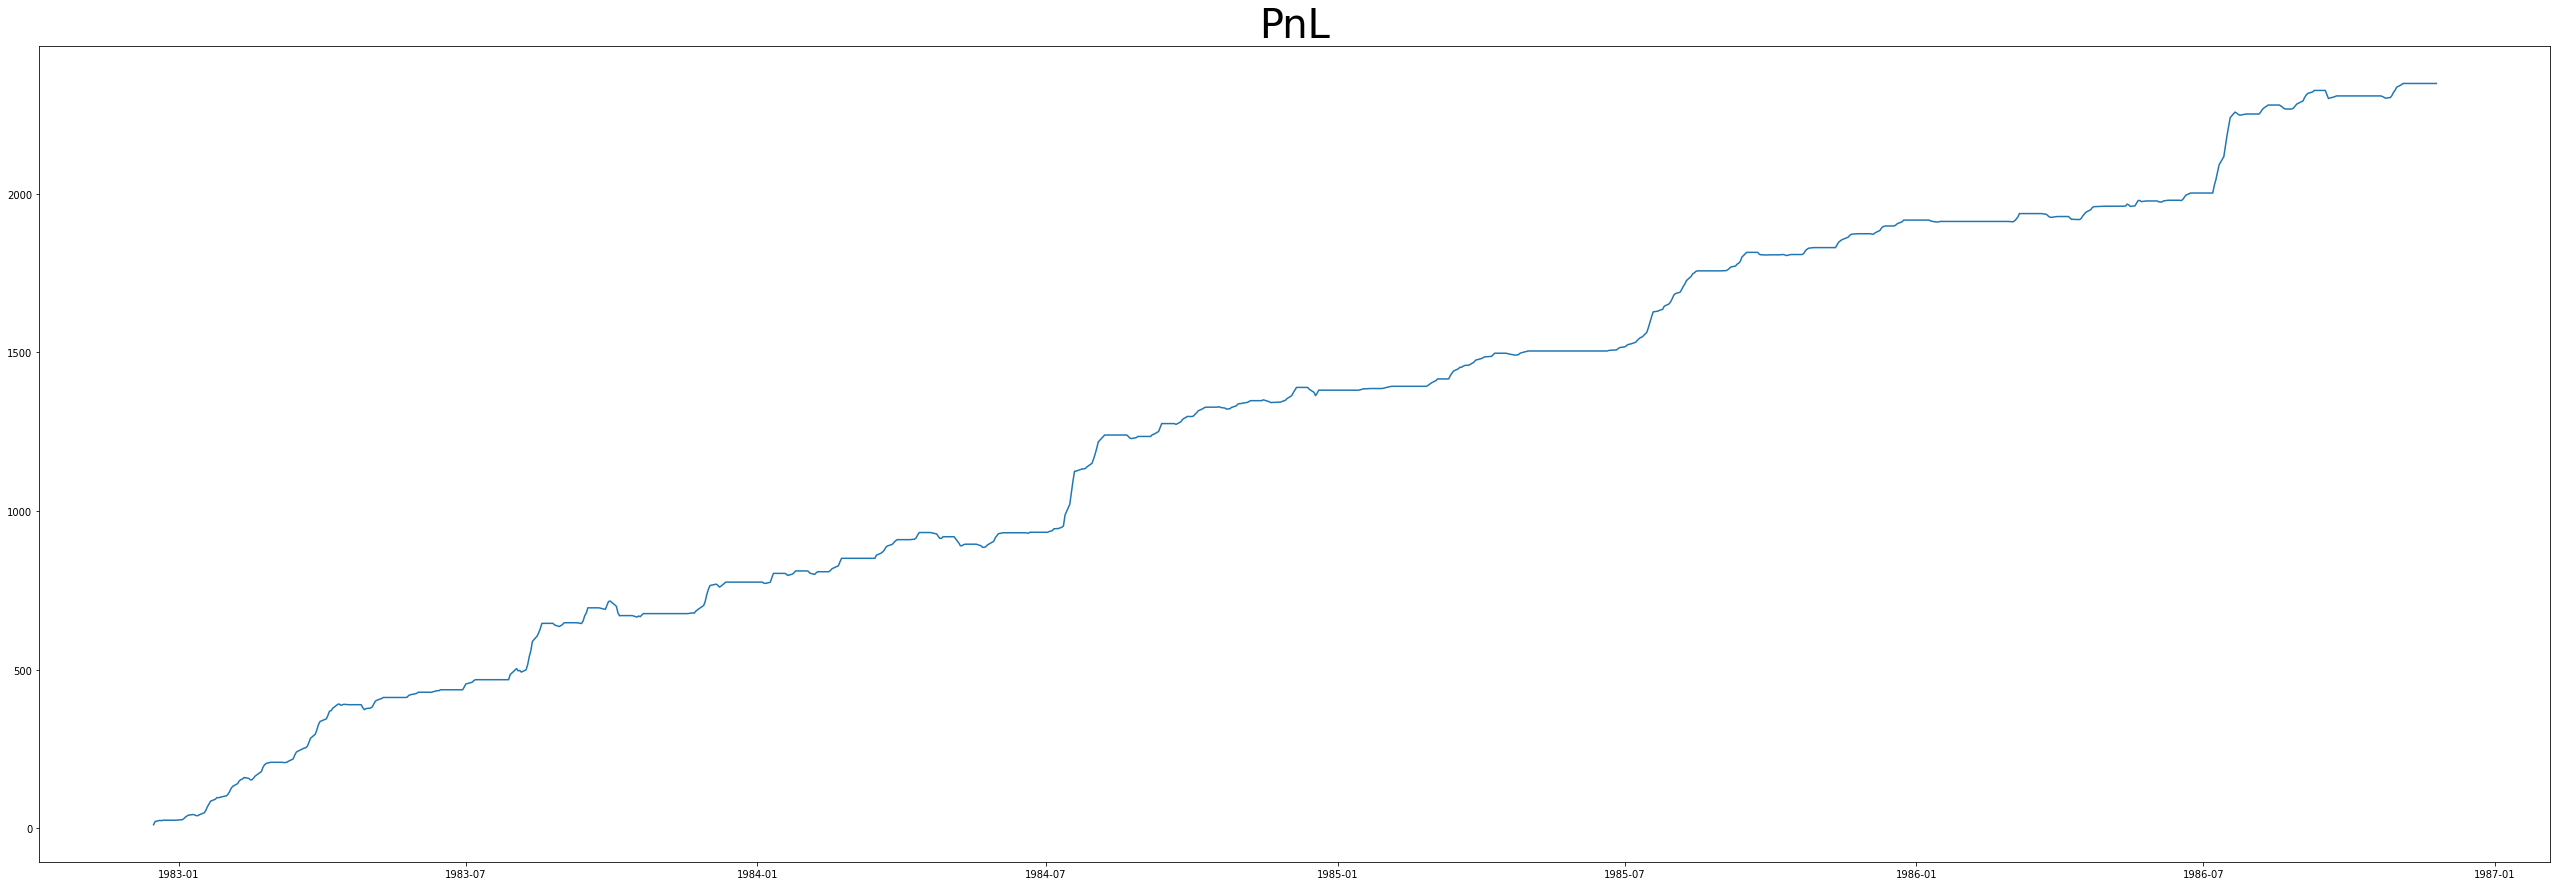

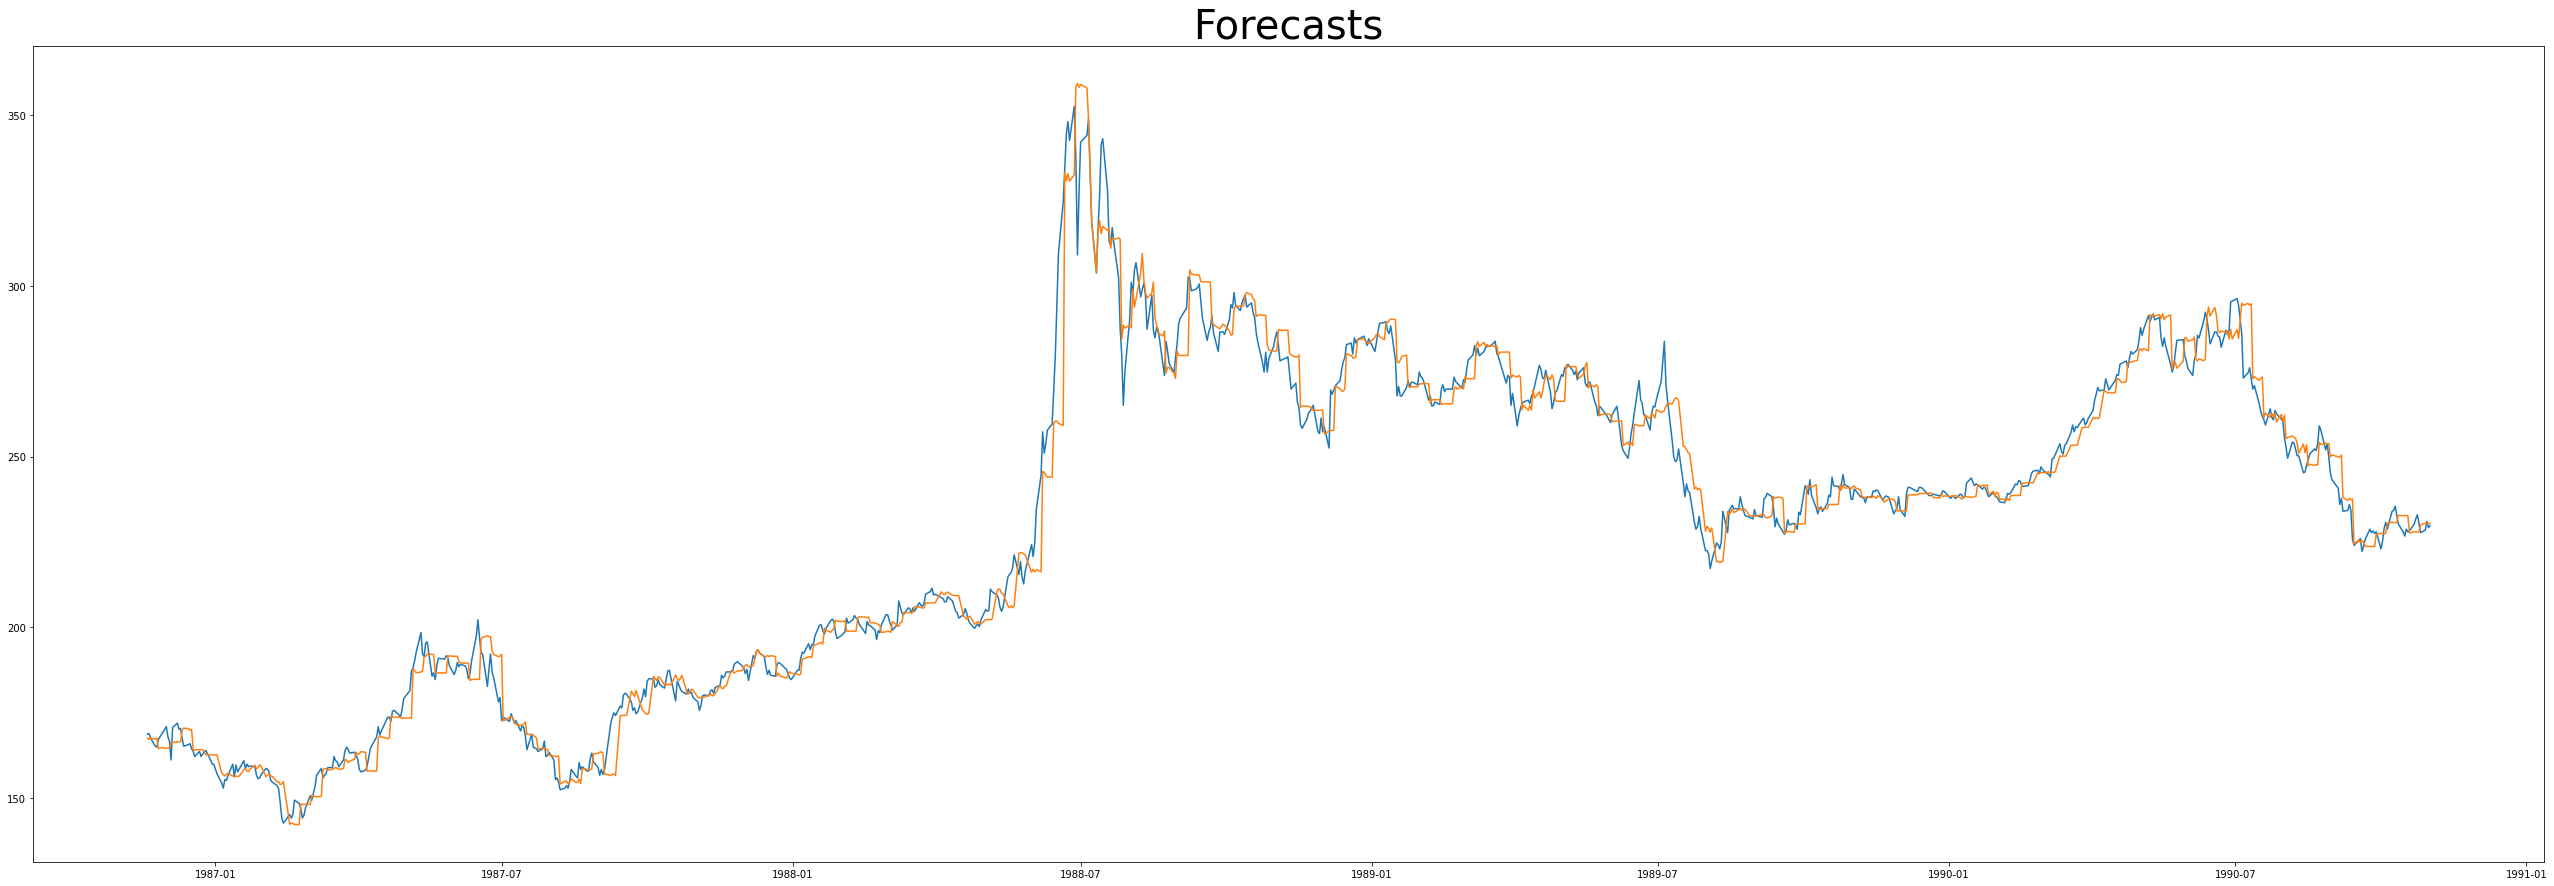

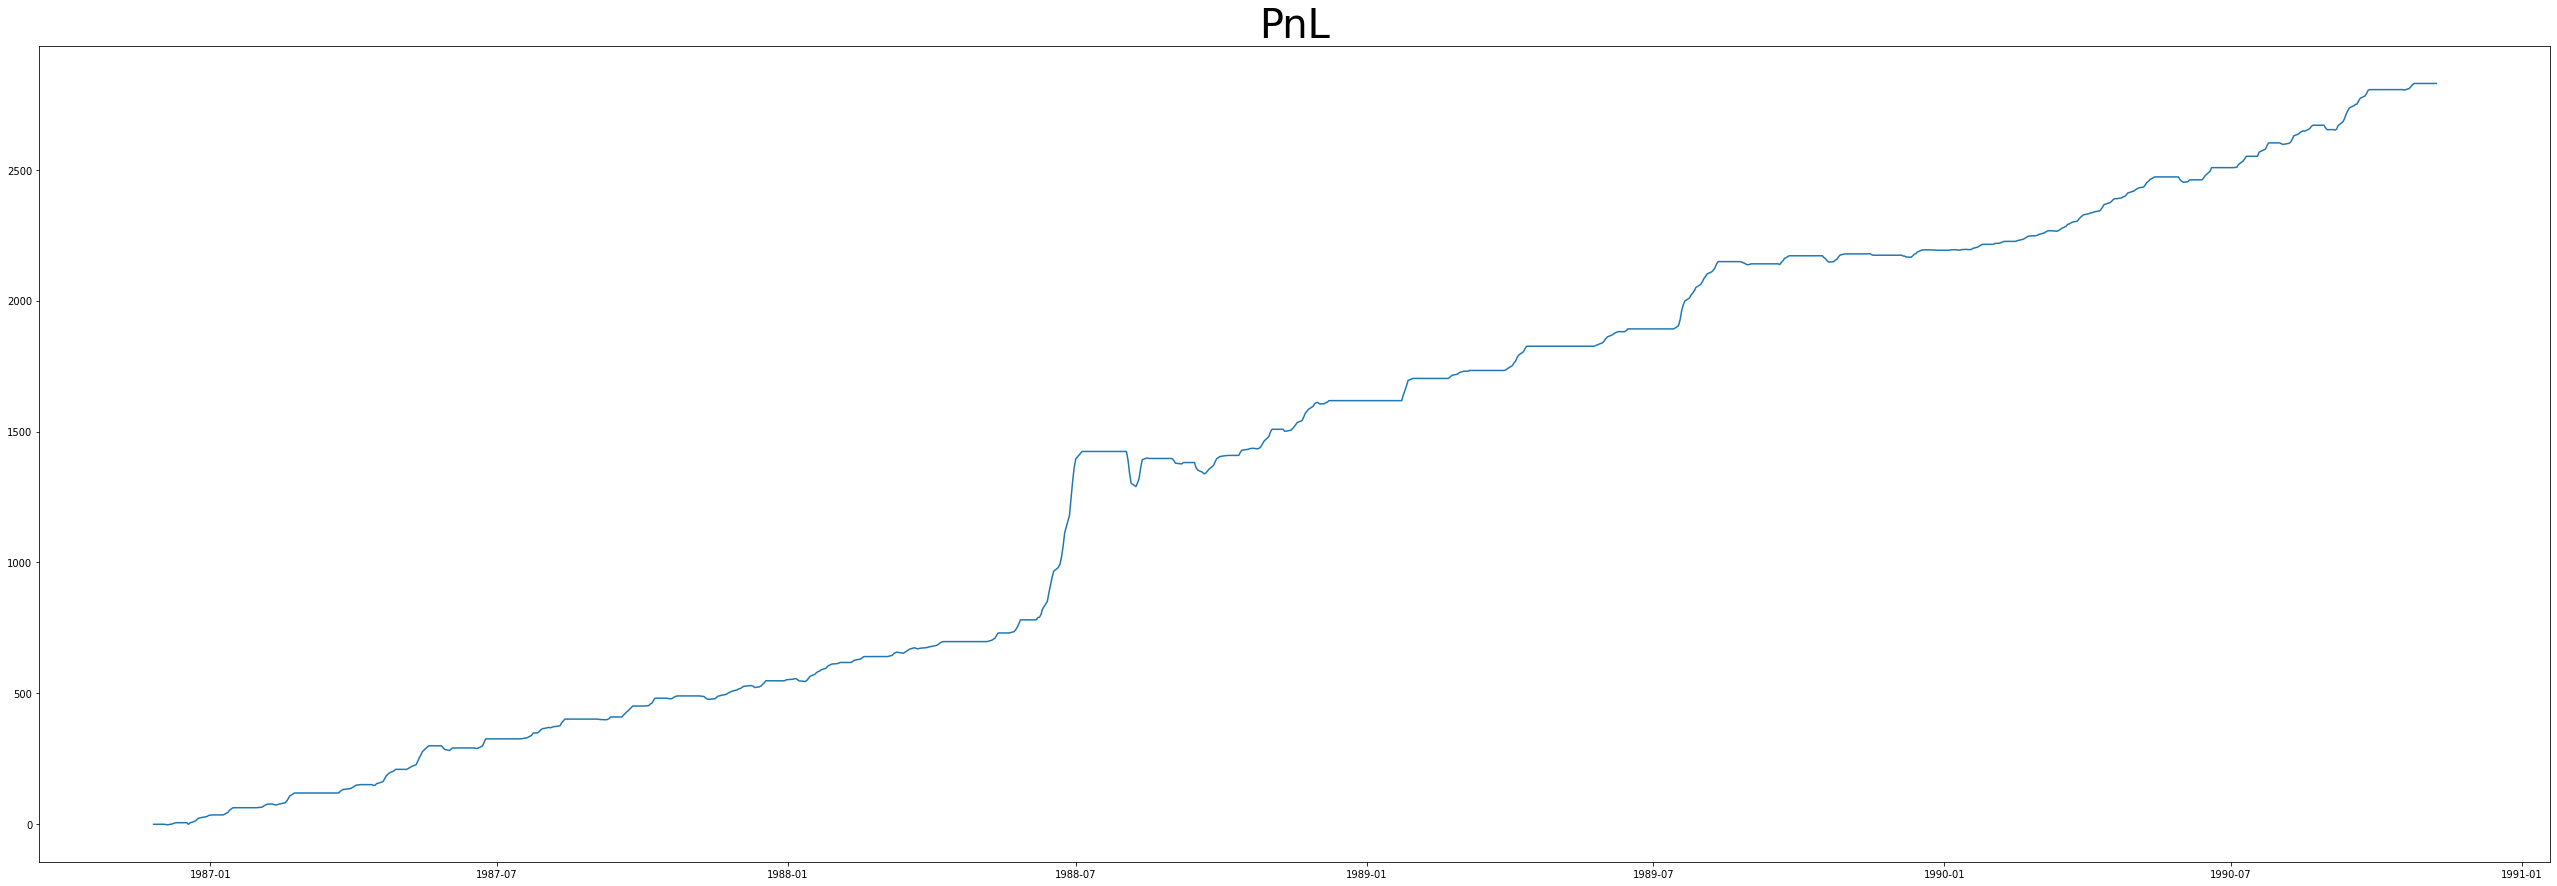

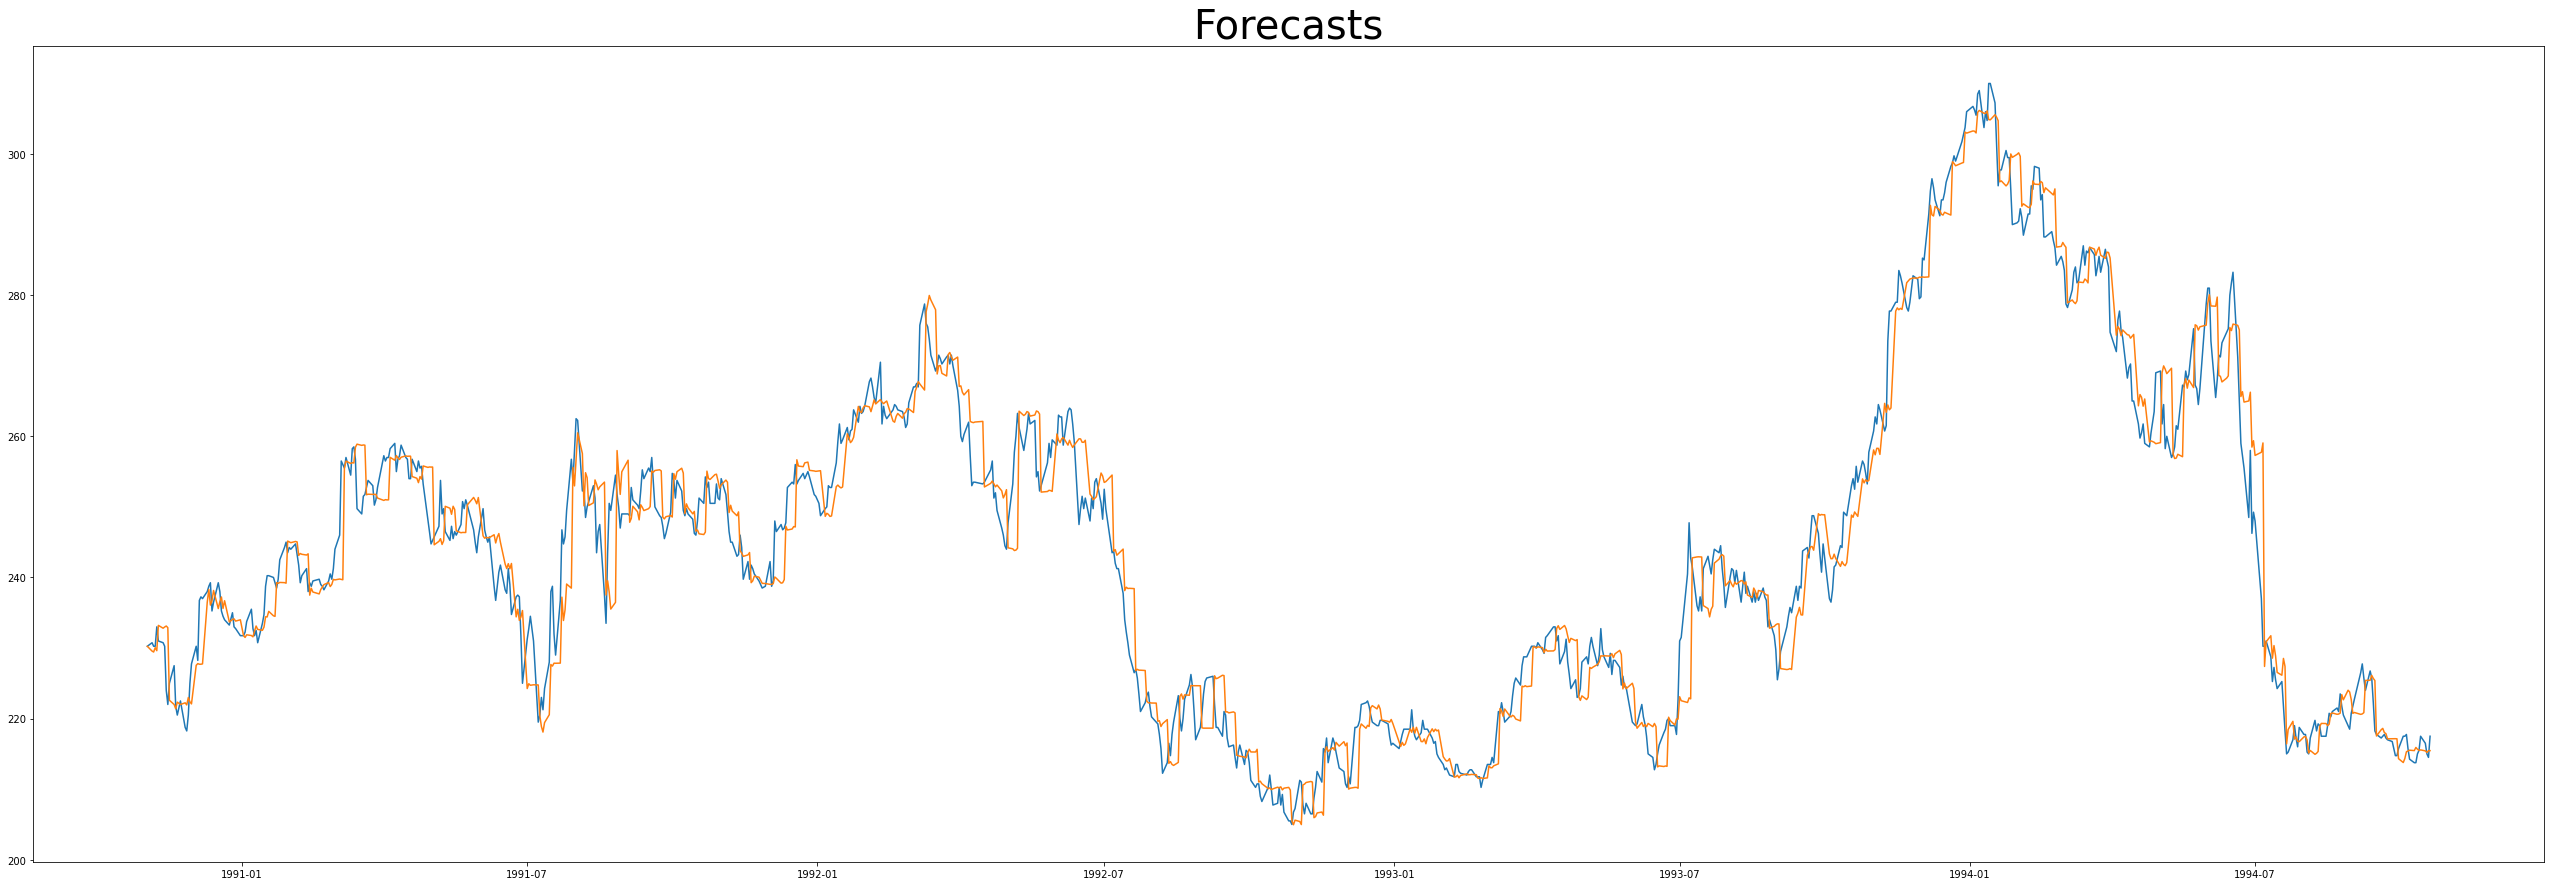

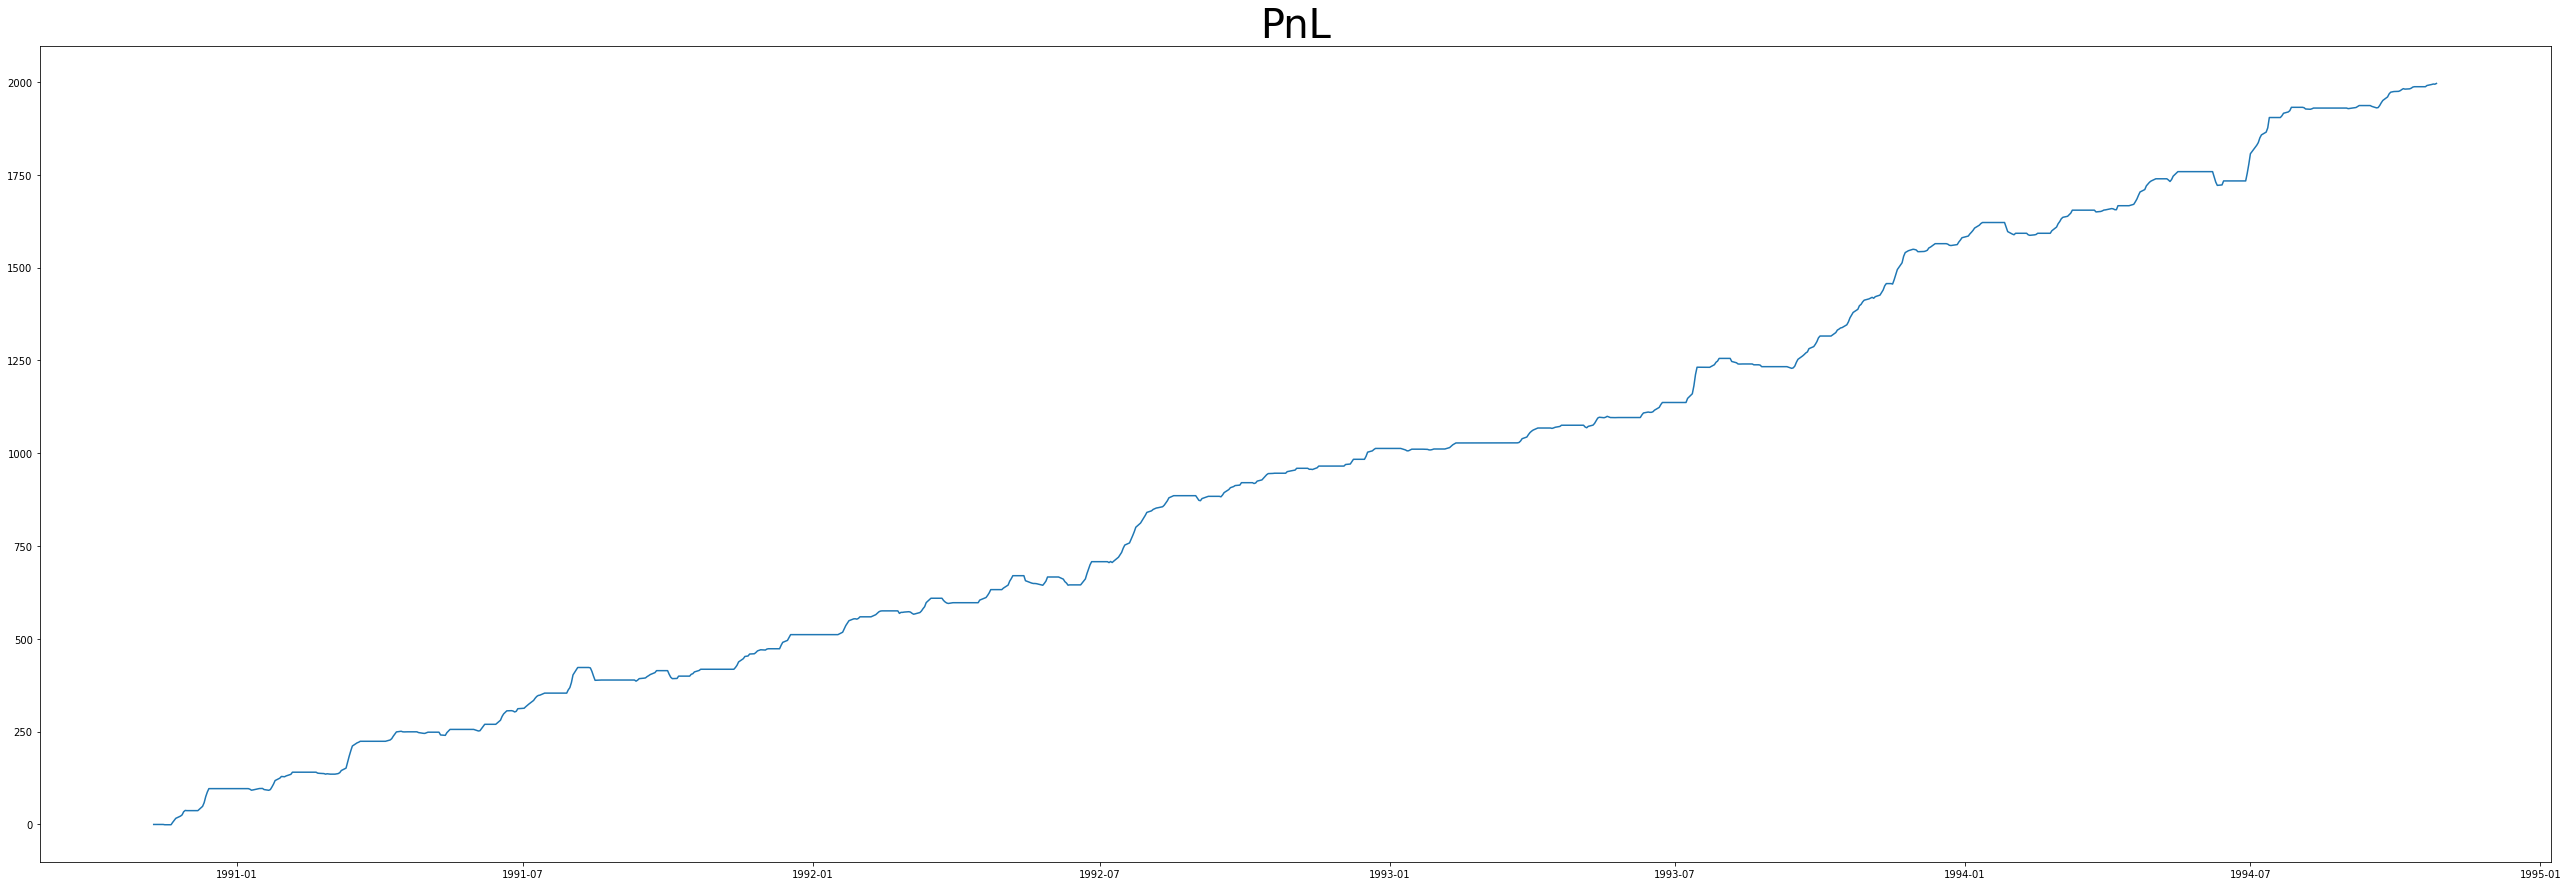

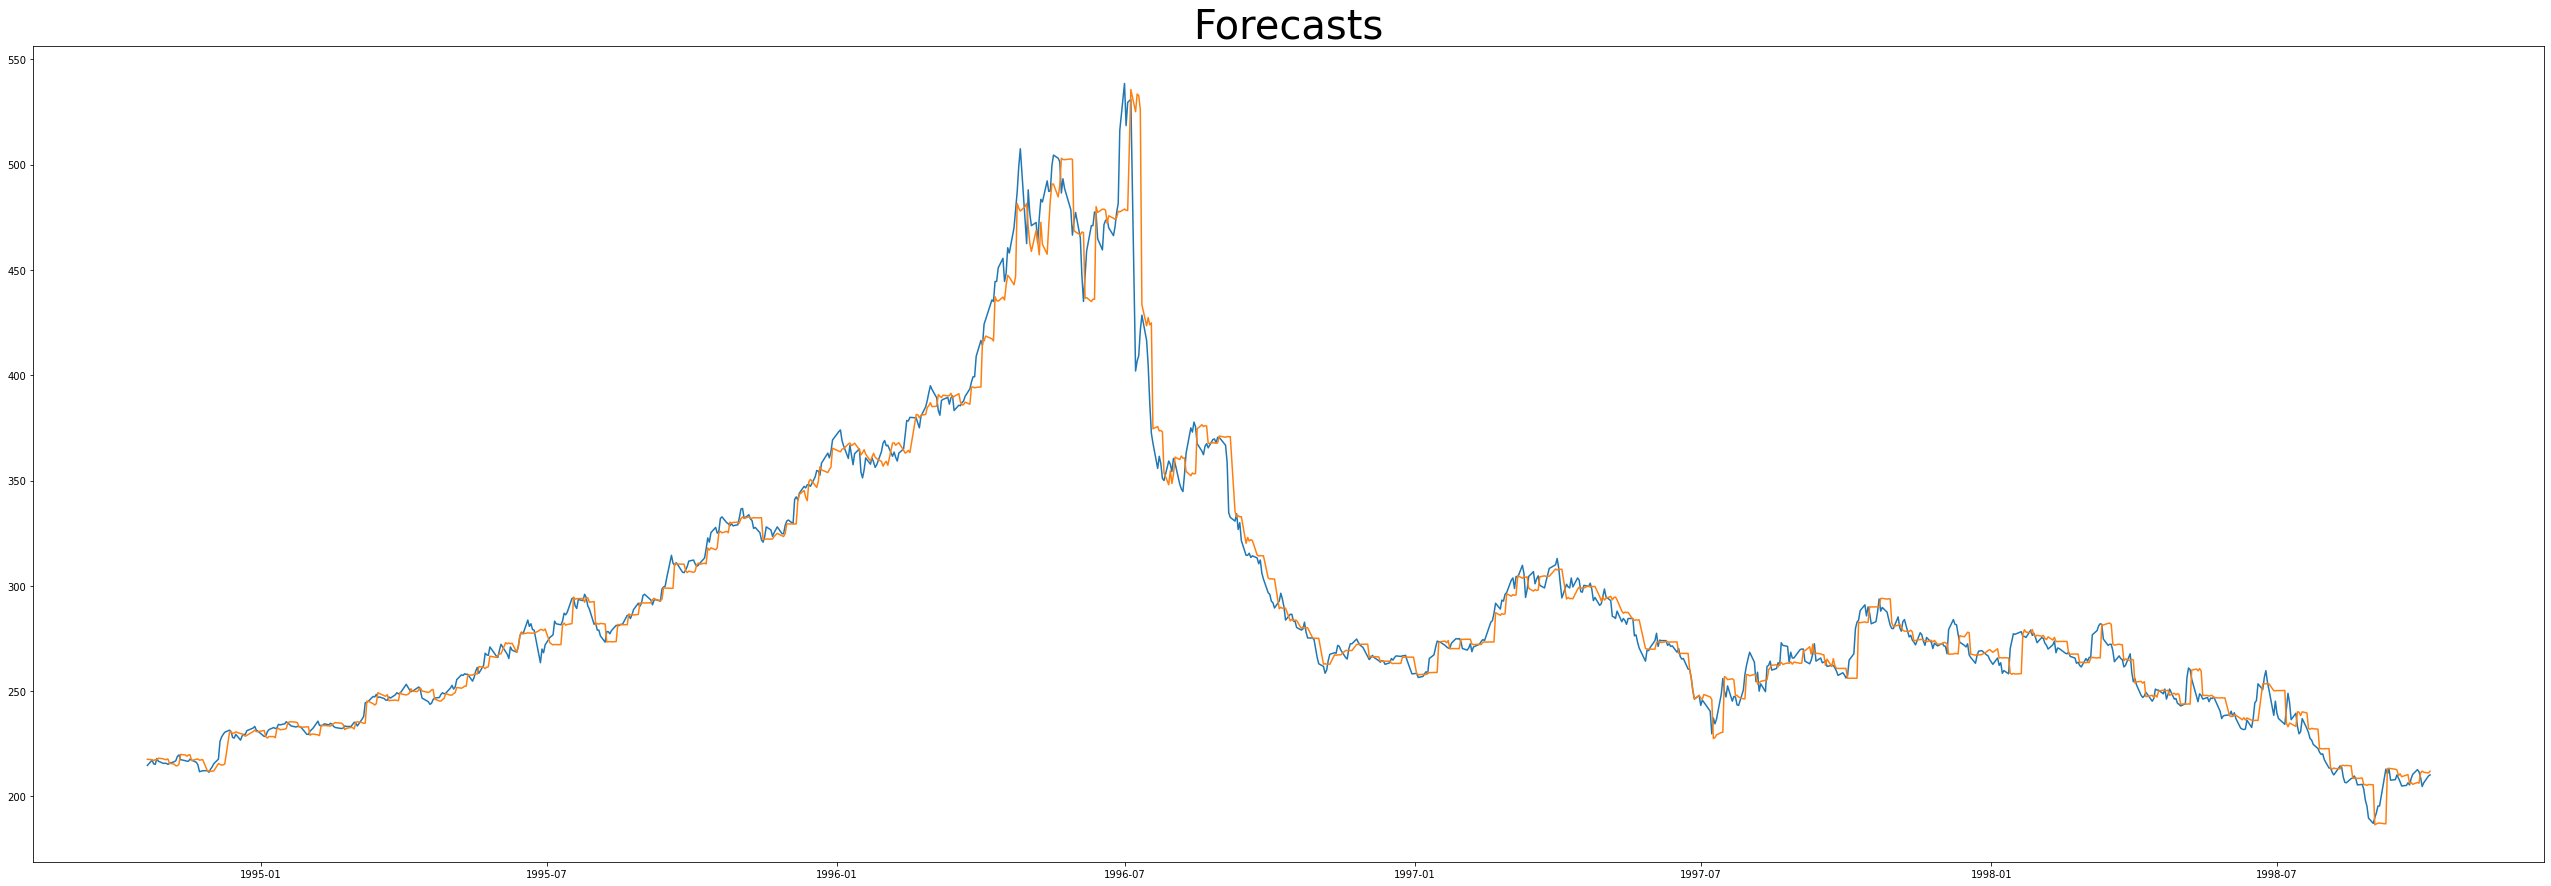

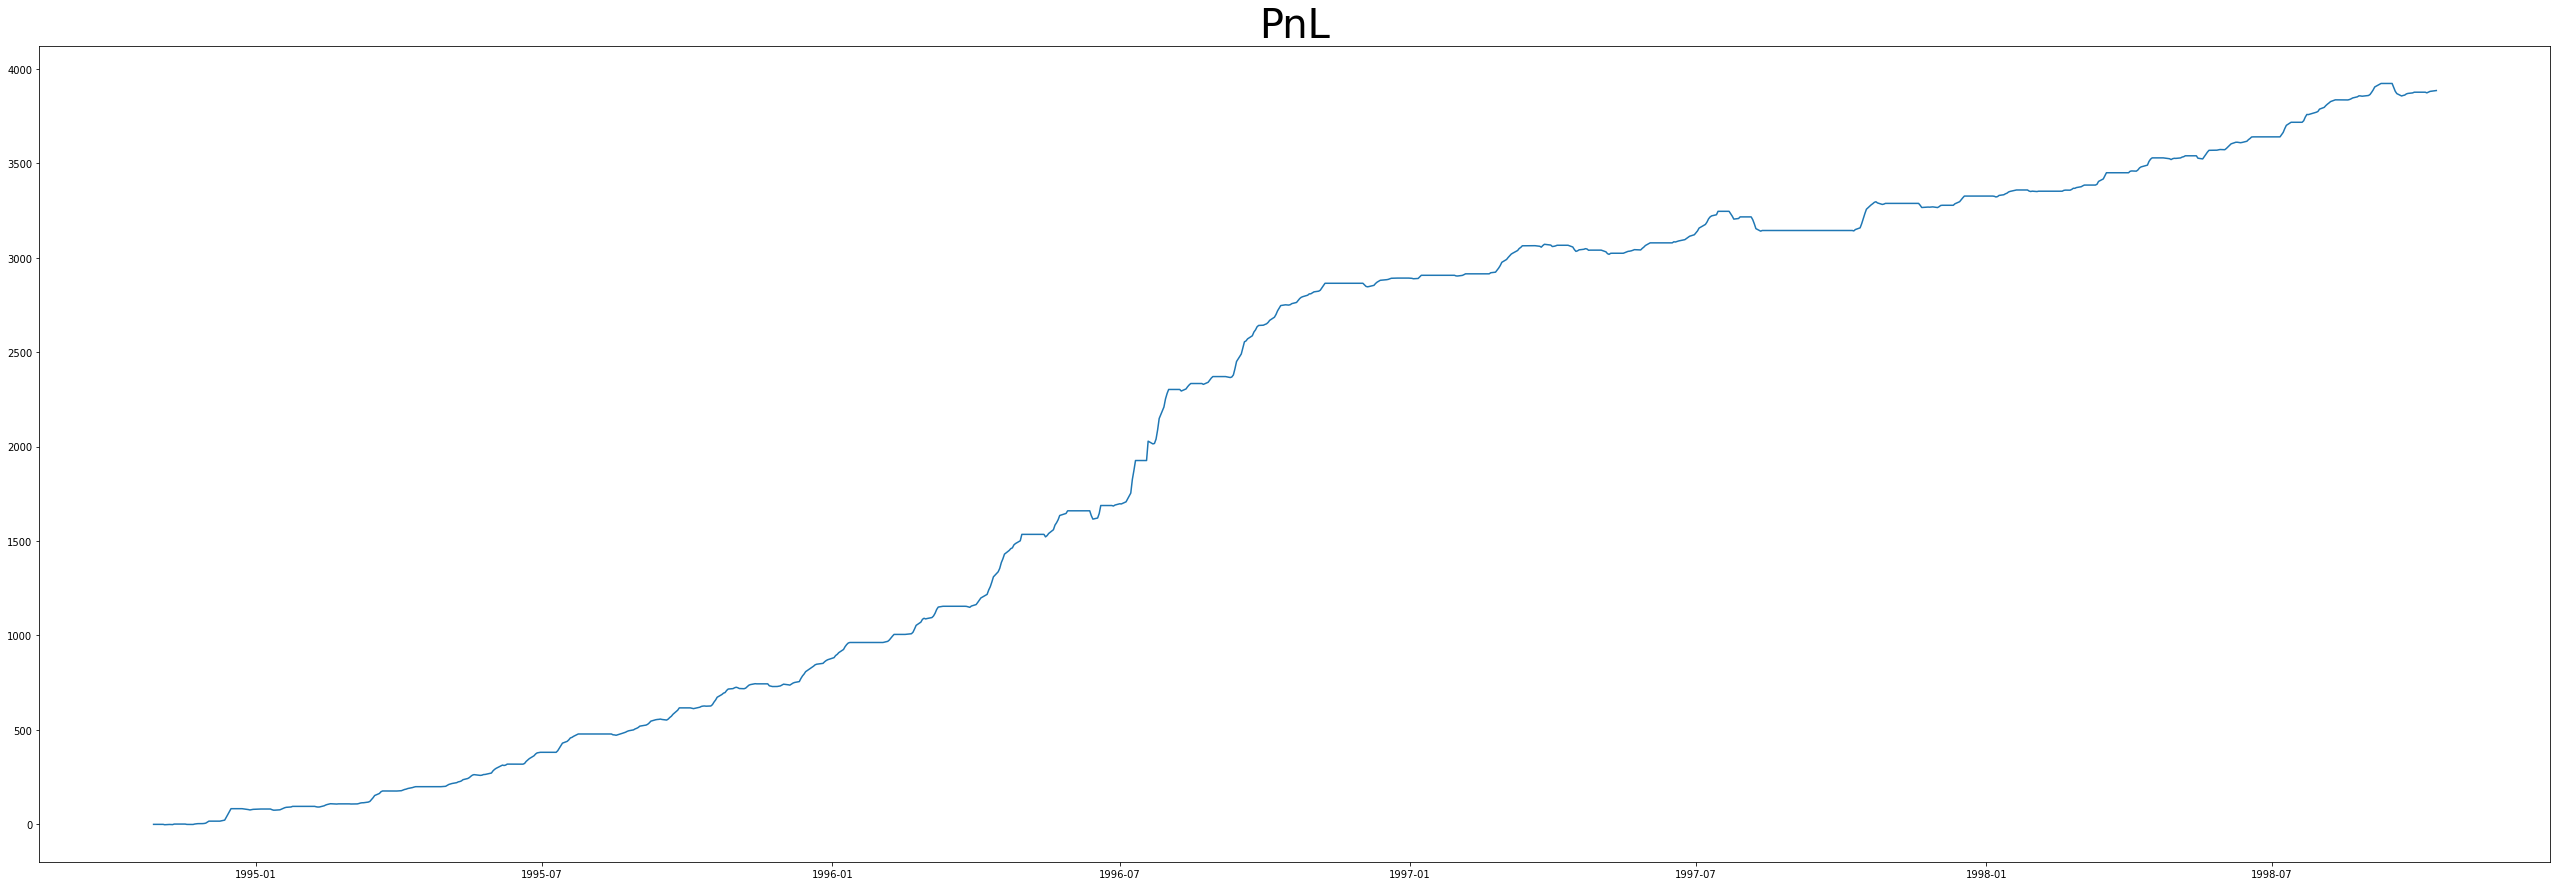

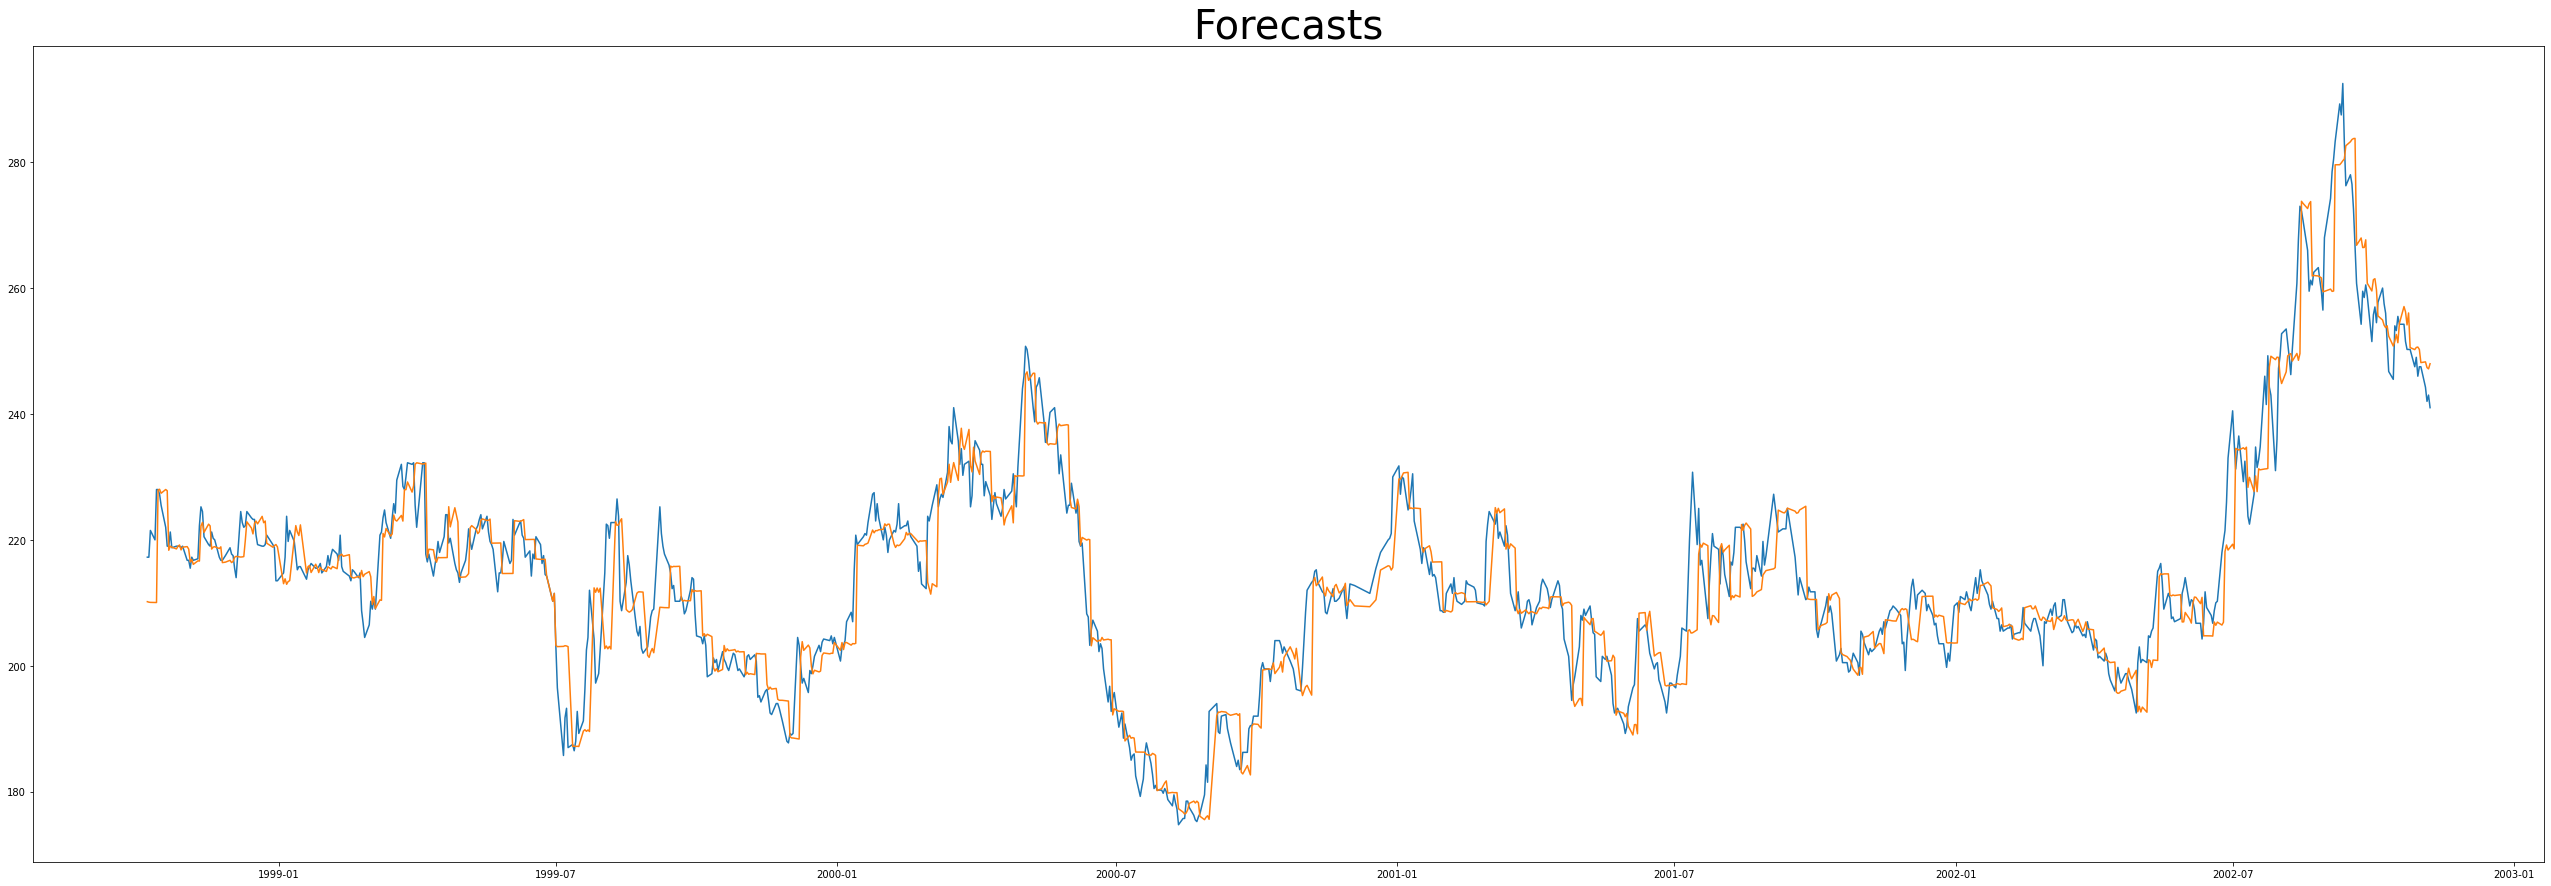

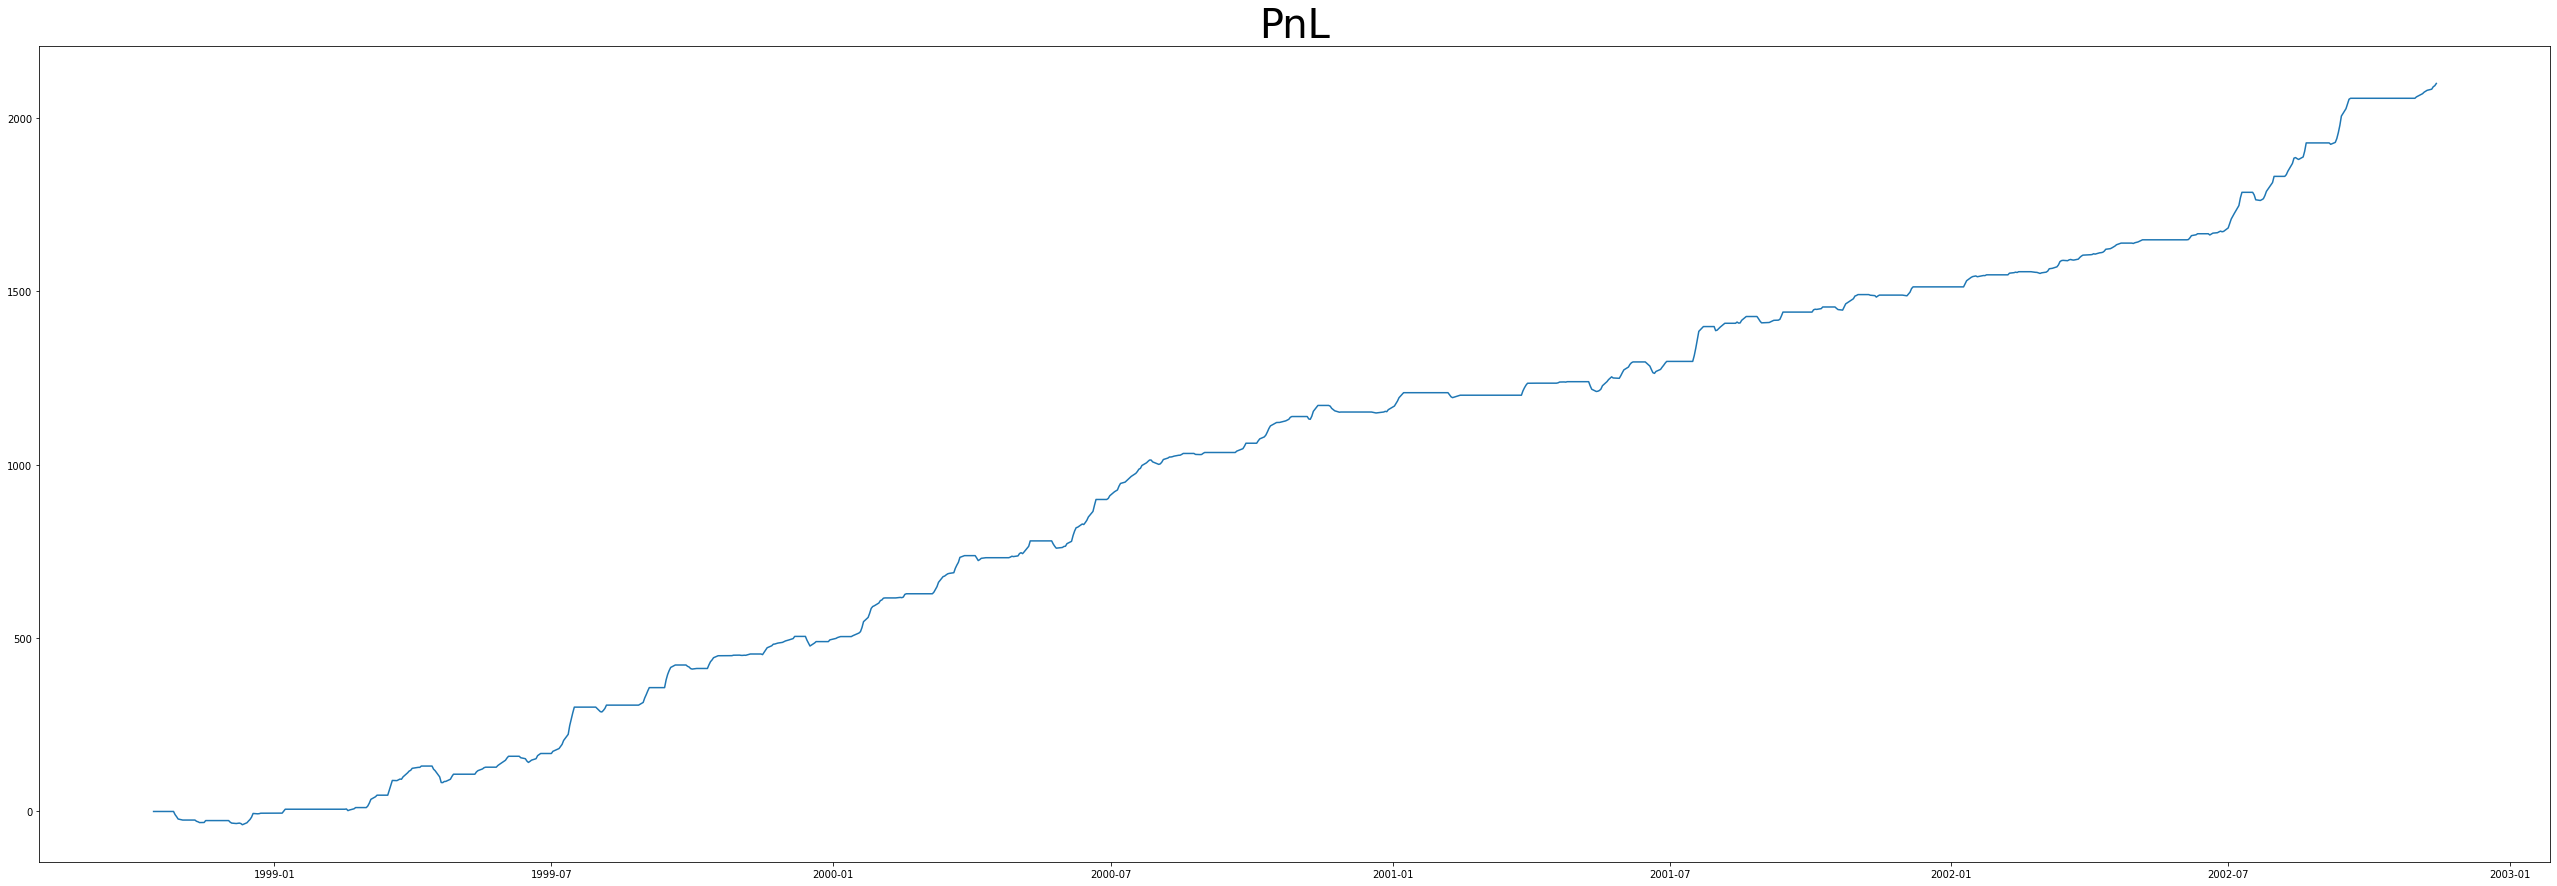

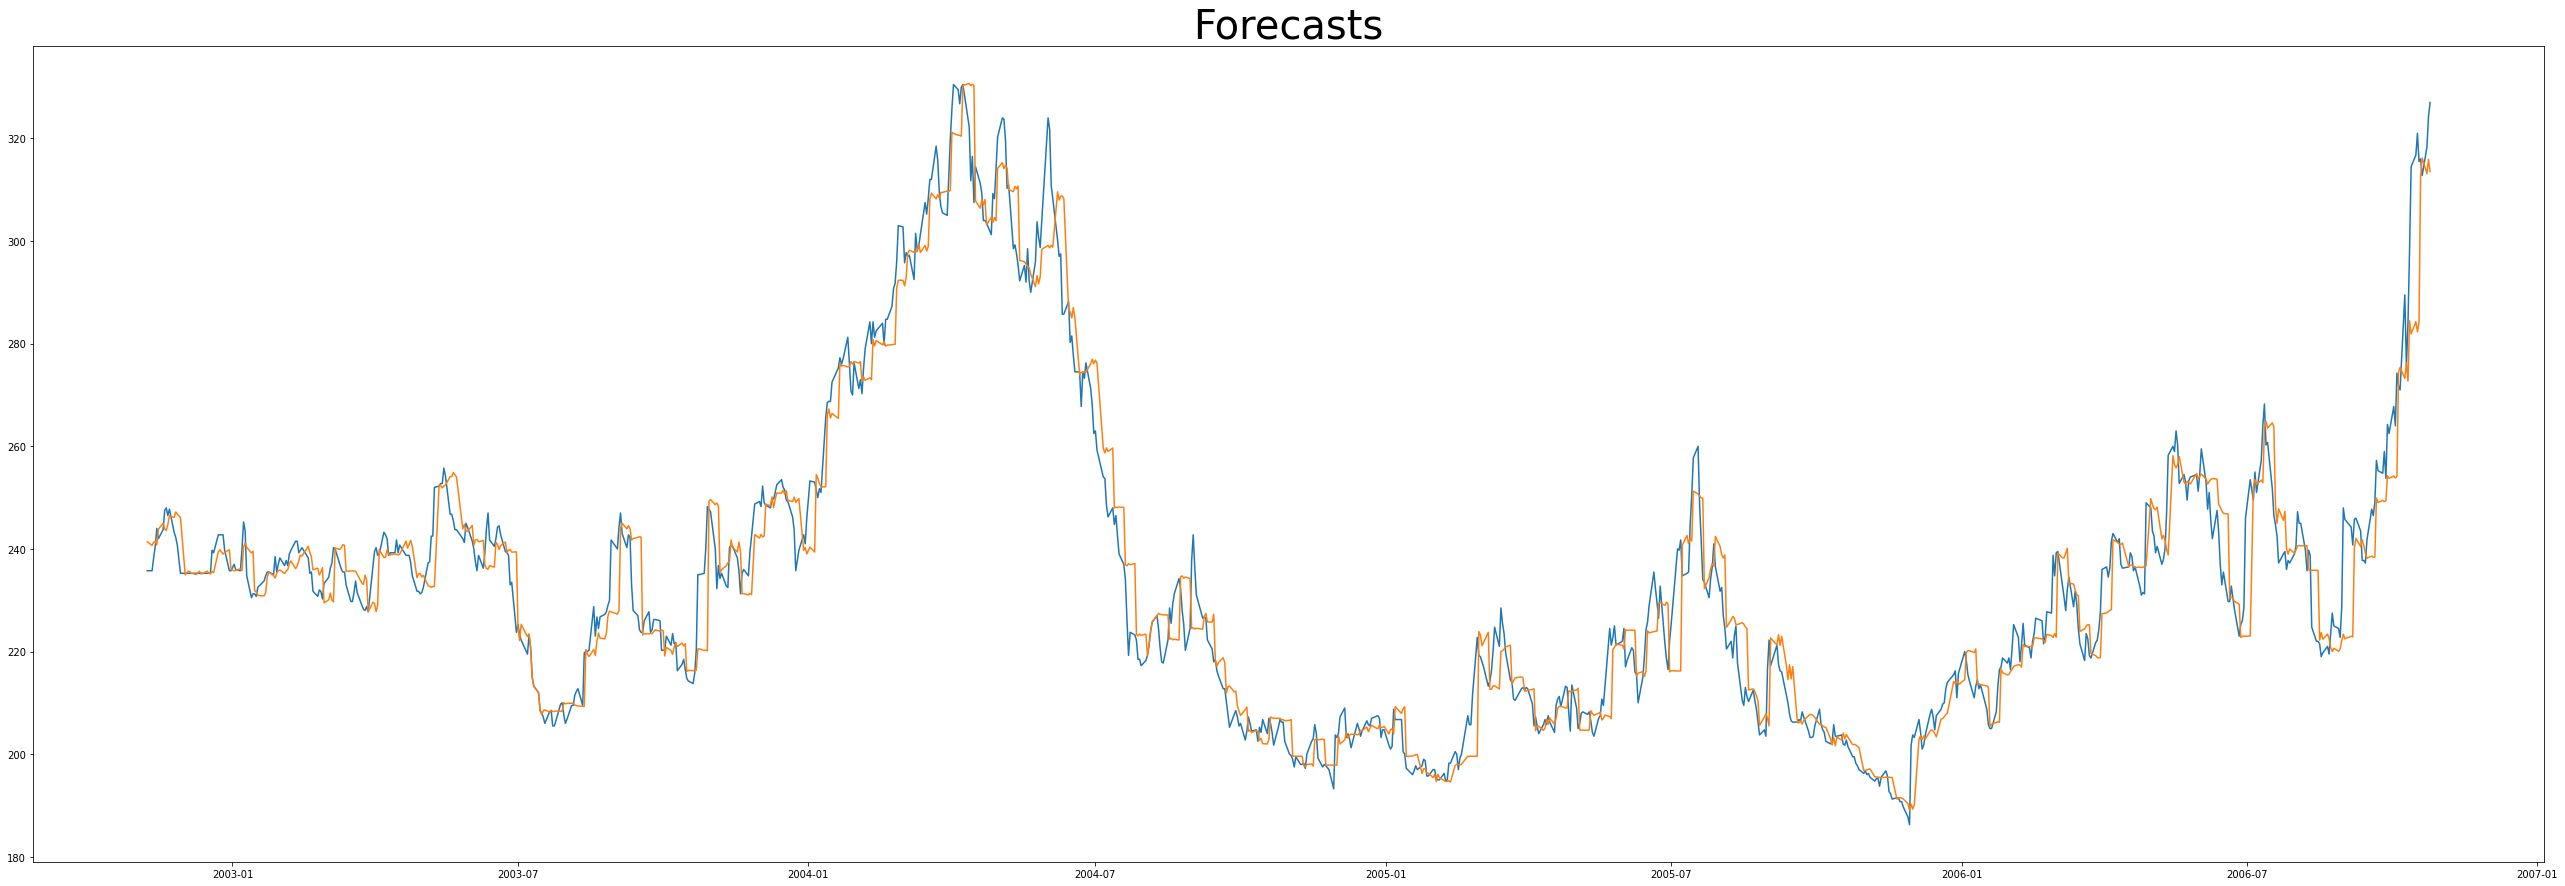

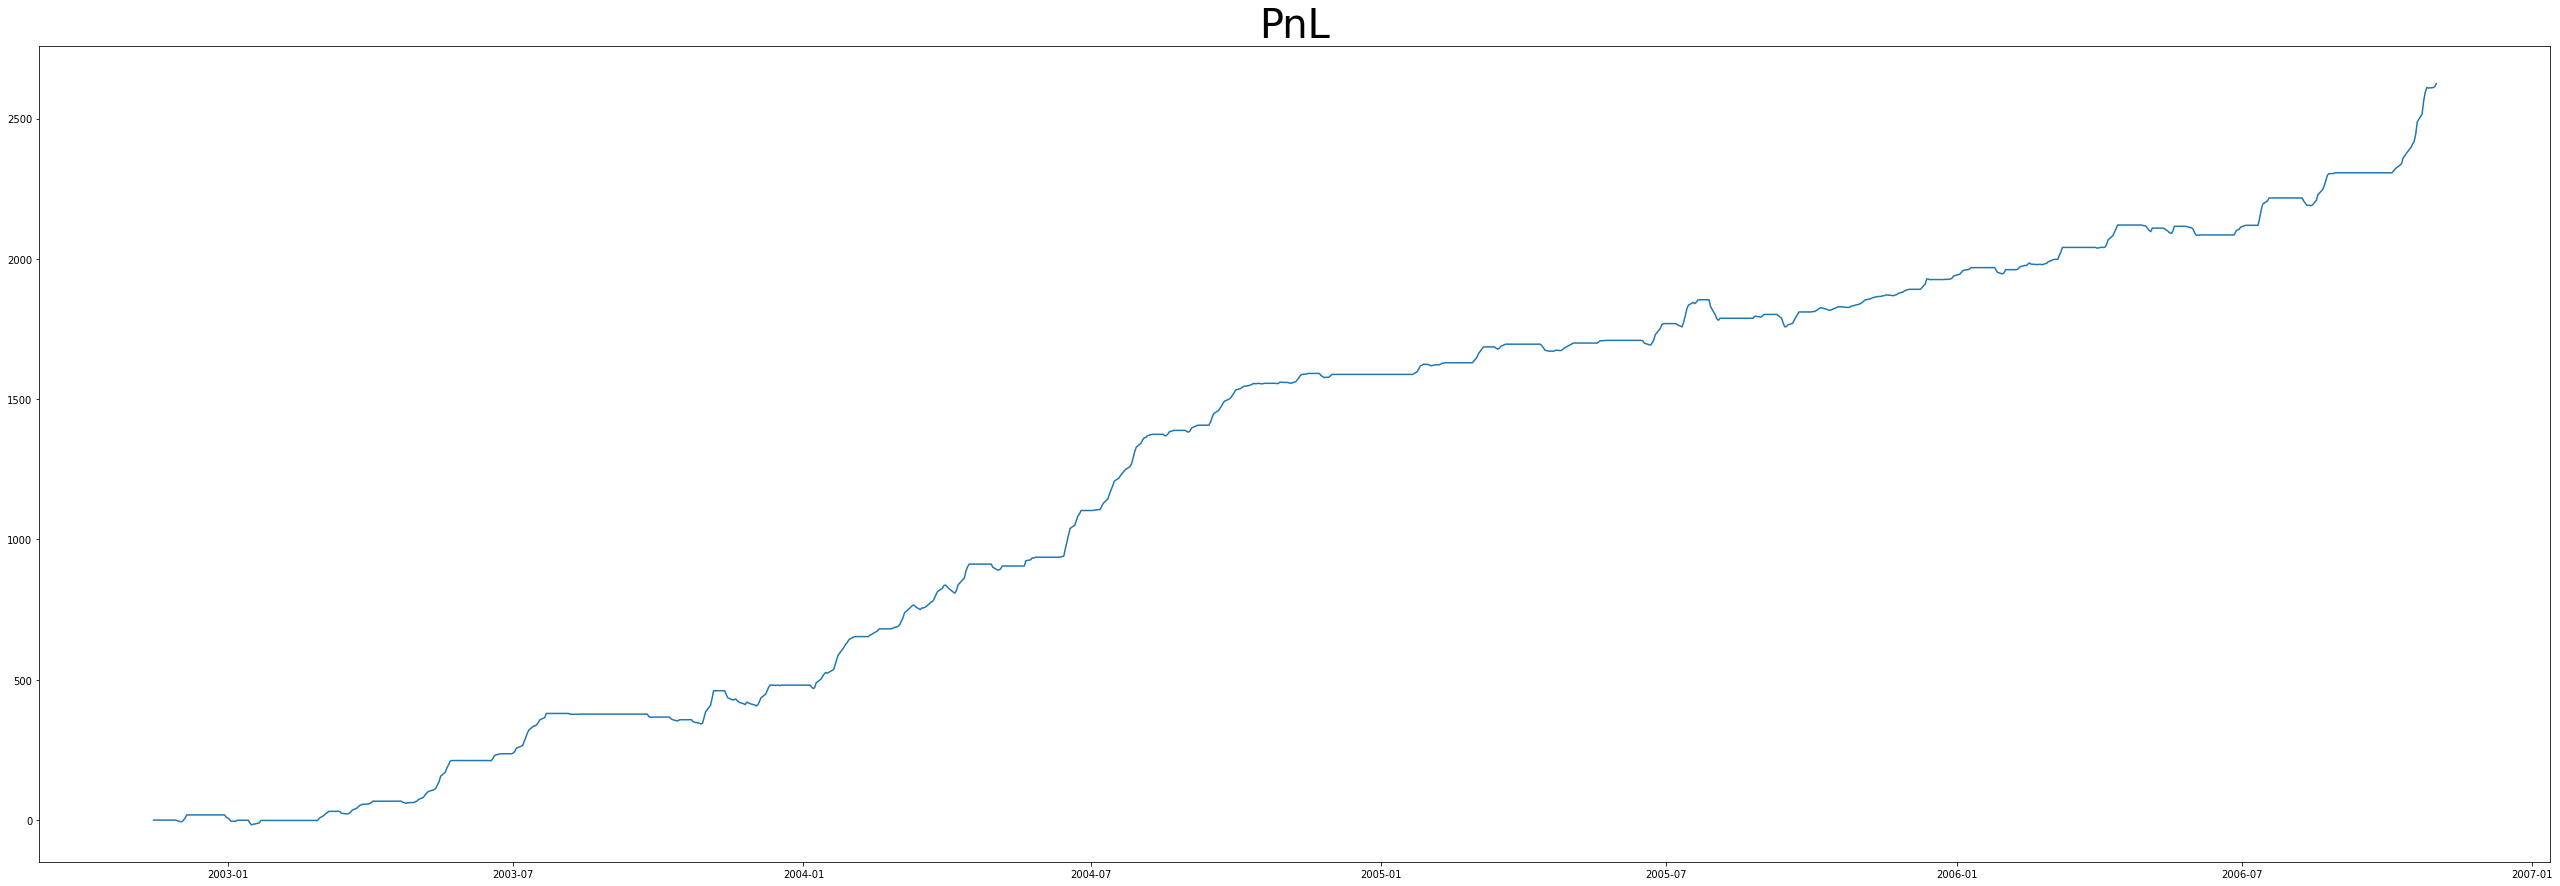

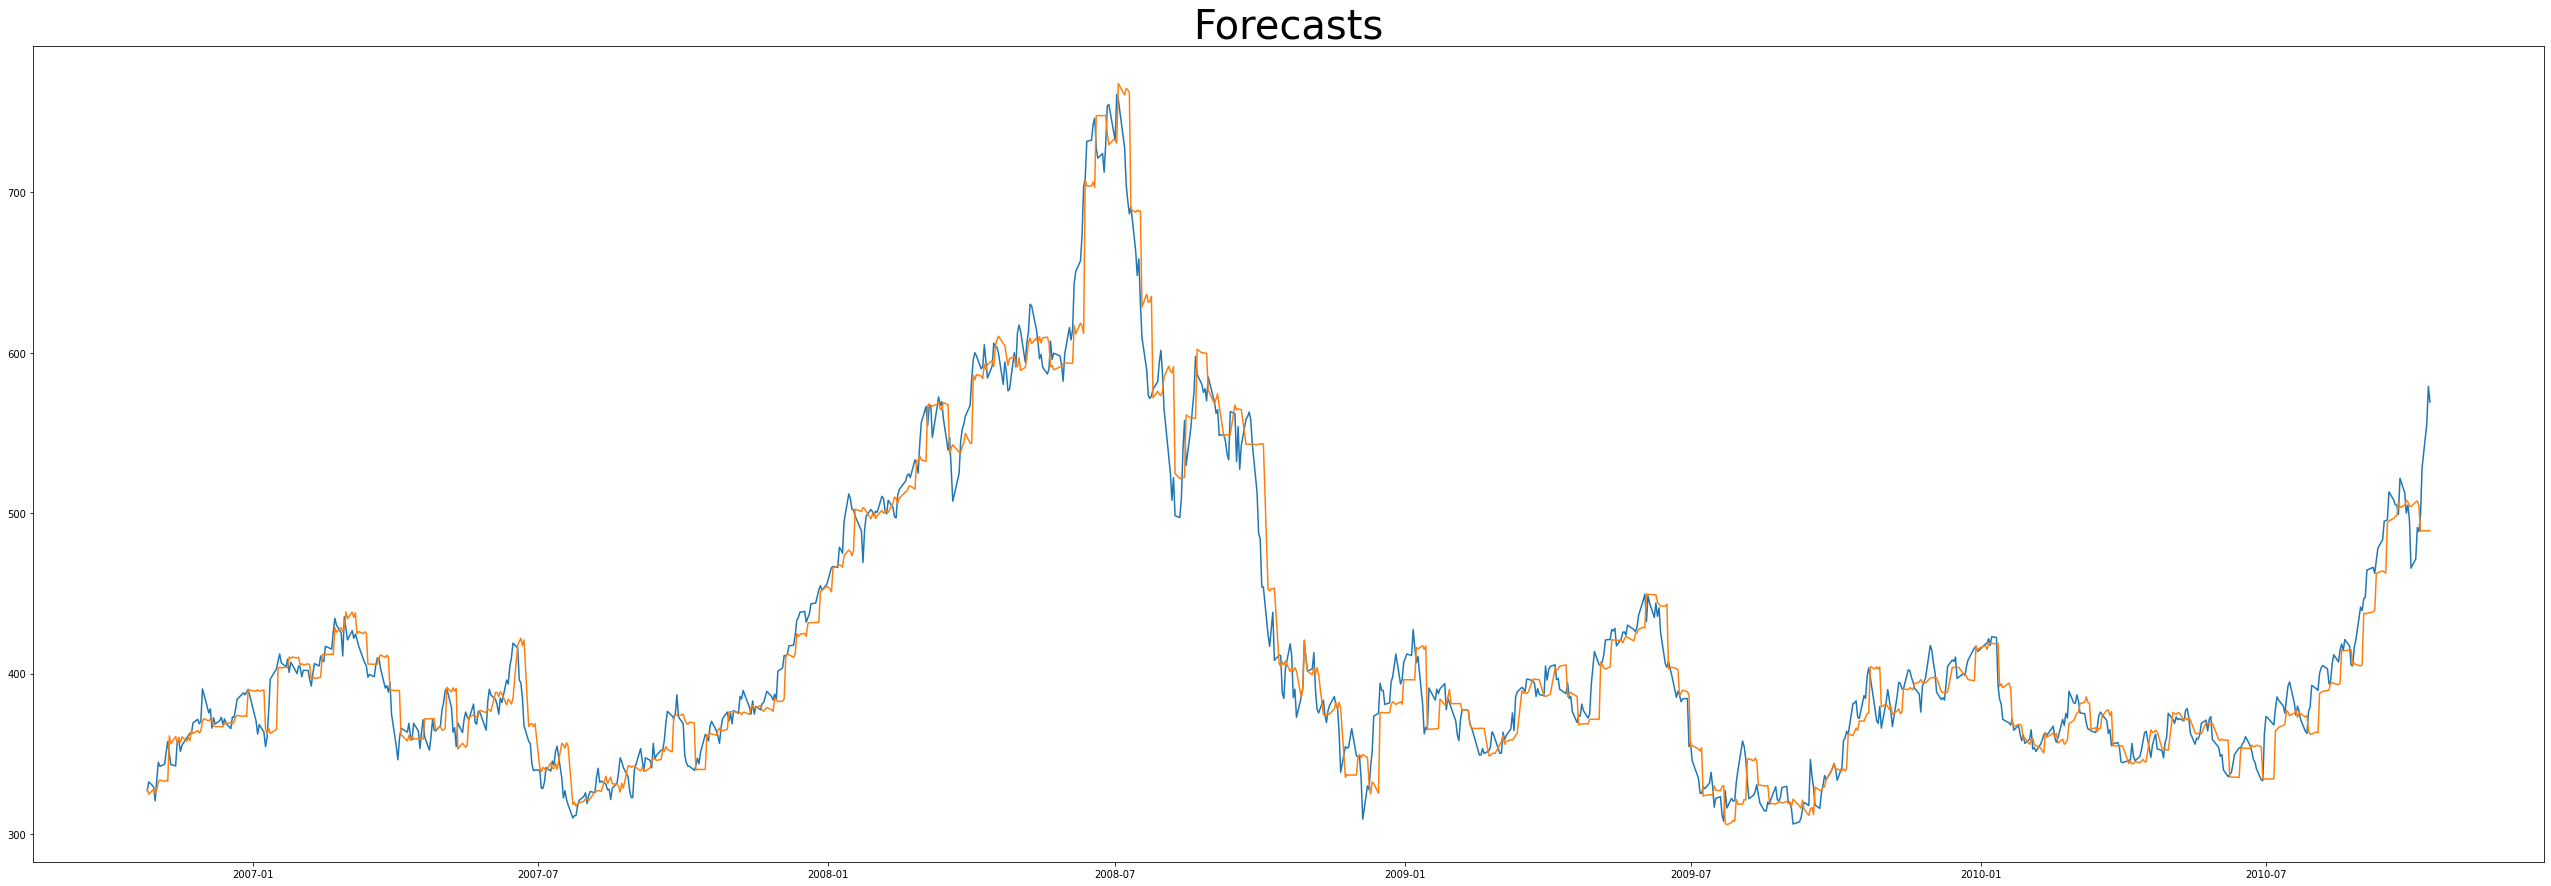

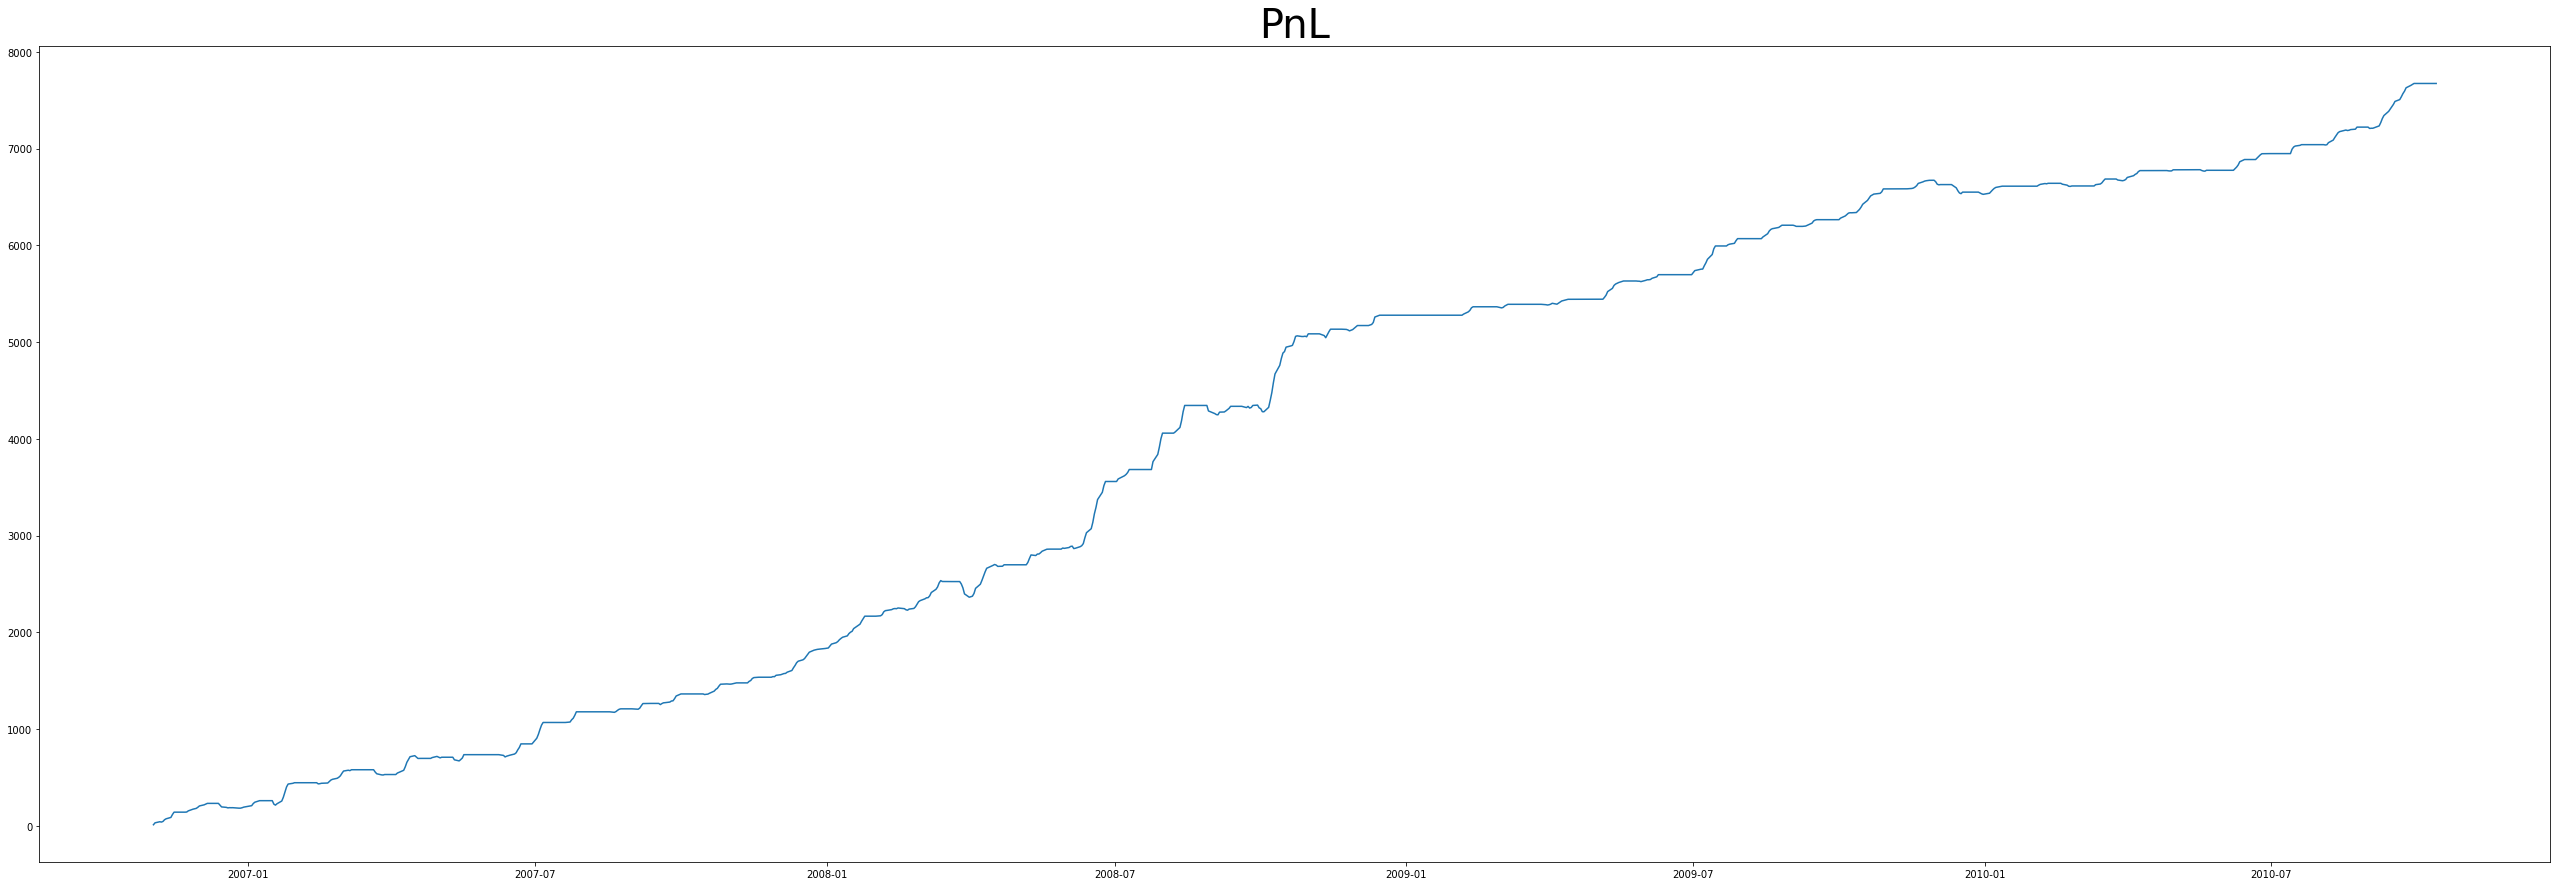

In [9]:
for i in range(10):
    plt.figure(figsize=(45,15))

    plt.plot(forcast_df['close'][i*1000:(i+1)*1000])
    plt.plot(forcast_df['pointForecast'][i*1000:(i+1)*1000])
    plt.title('Forecasts',fontsize=40)
    plt.show()

    plt.figure(figsize=(45,15))

    plt.plot(pnl_df['pnl'][i*1000:(i+1)*1000].cumsum())
    plt.title('PnL',fontsize=40)
    plt.show()

# Metadata analysis

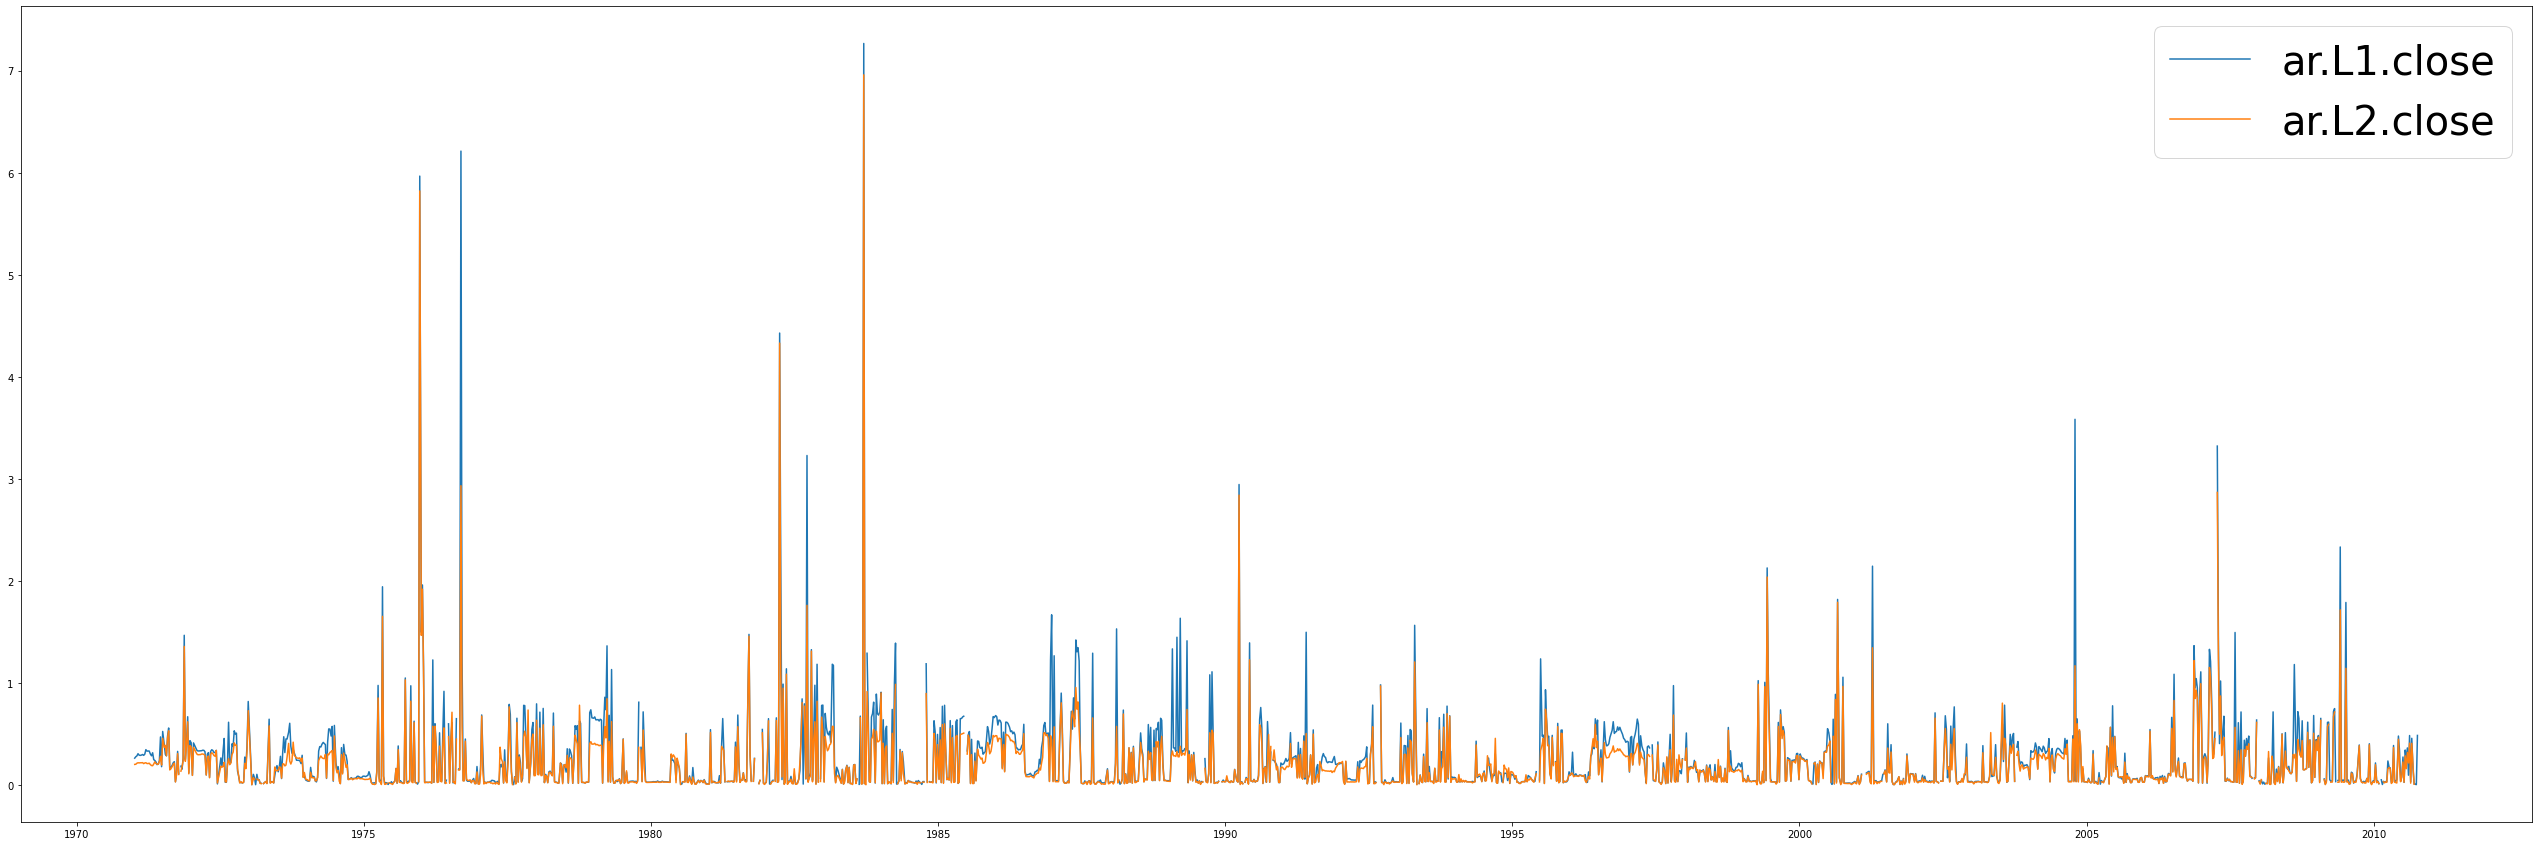

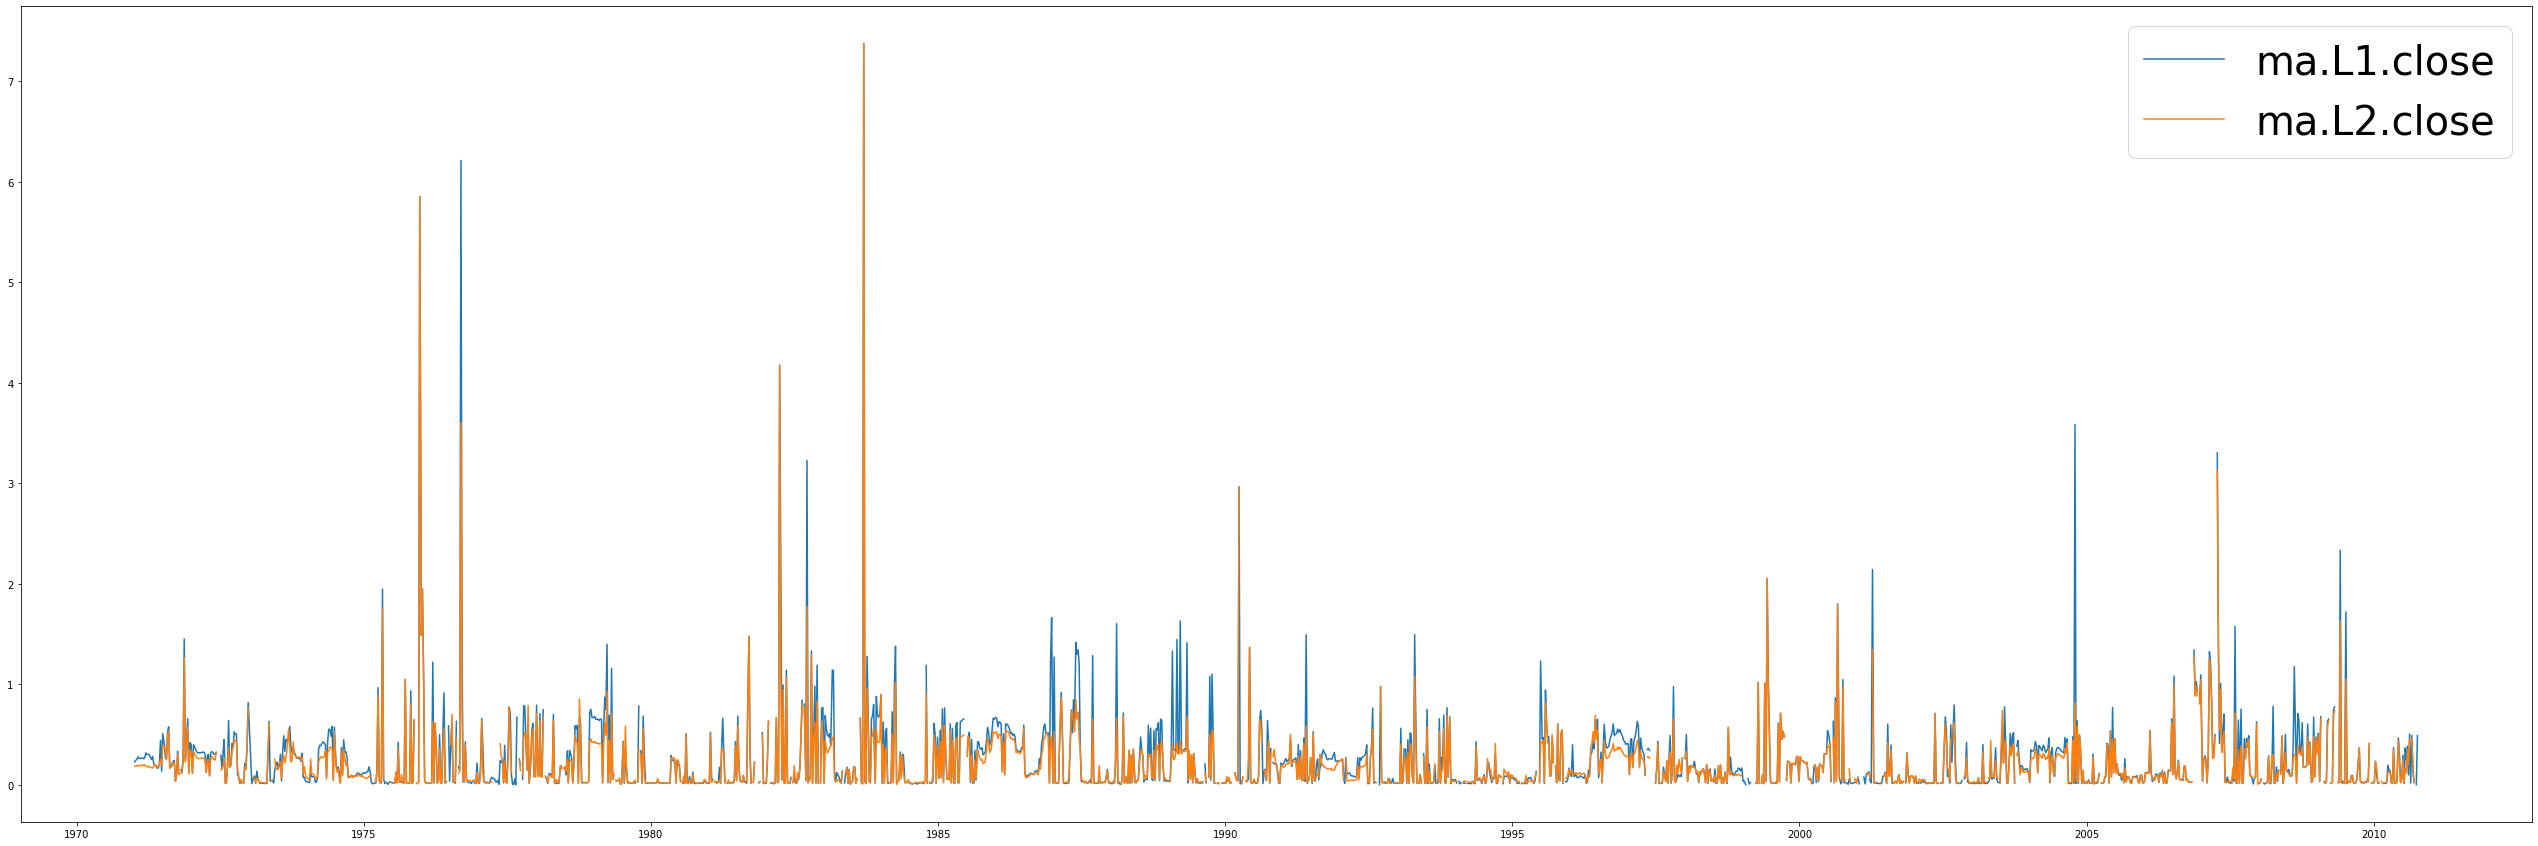

In [13]:
plt.figure(figsize=(45,15))

for i in range(1,3):
    plt.plot(metadata_df[f'ar.L{i}.close'])

plt.legend(['ar.L1.close','ar.L2.close'],fontsize=40)

plt.show()

plt.figure(figsize=(45,15))

for i in range(1,3):
    plt.plot(metadata_df[f'ma.L{i}.close'])
    
plt.legend(['ma.L1.close','ma.L2.close'],fontsize=40)

plt.show()

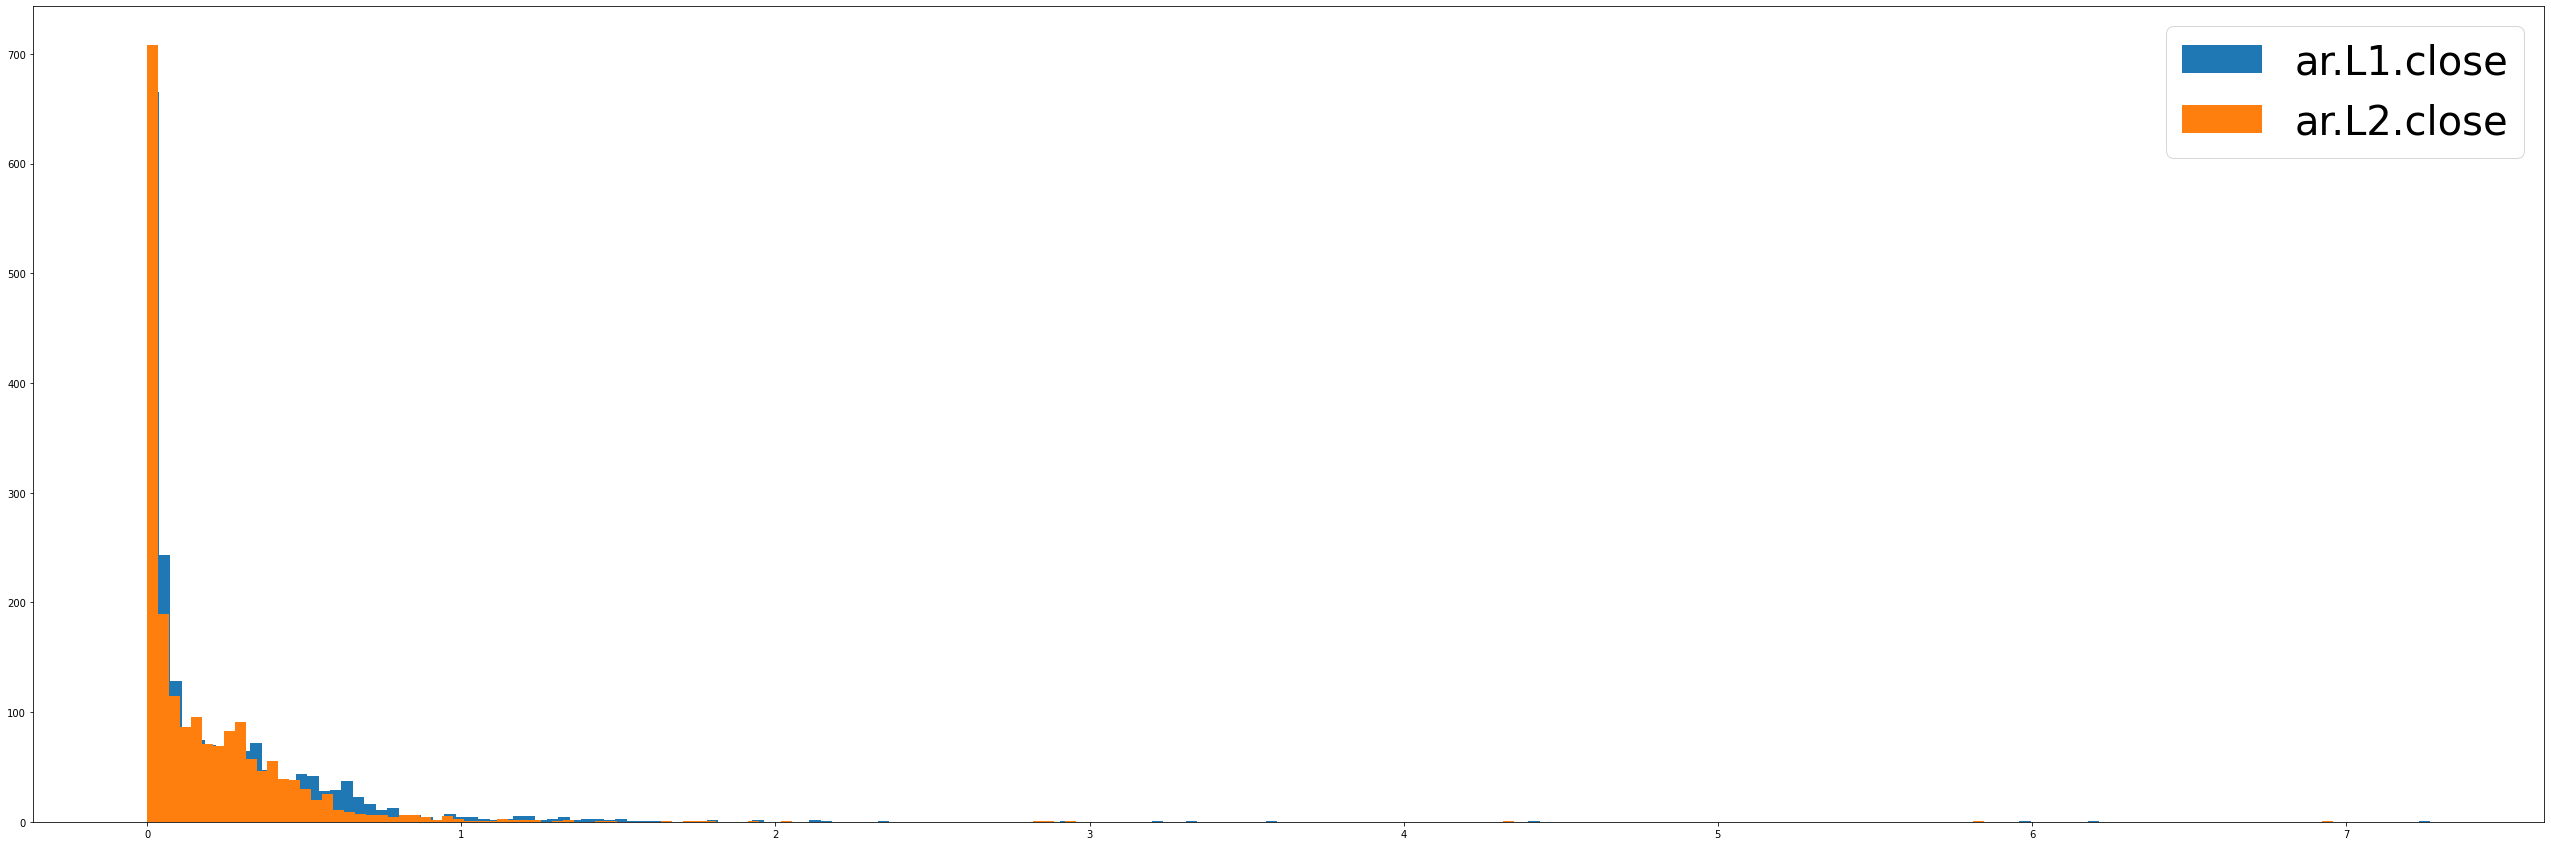

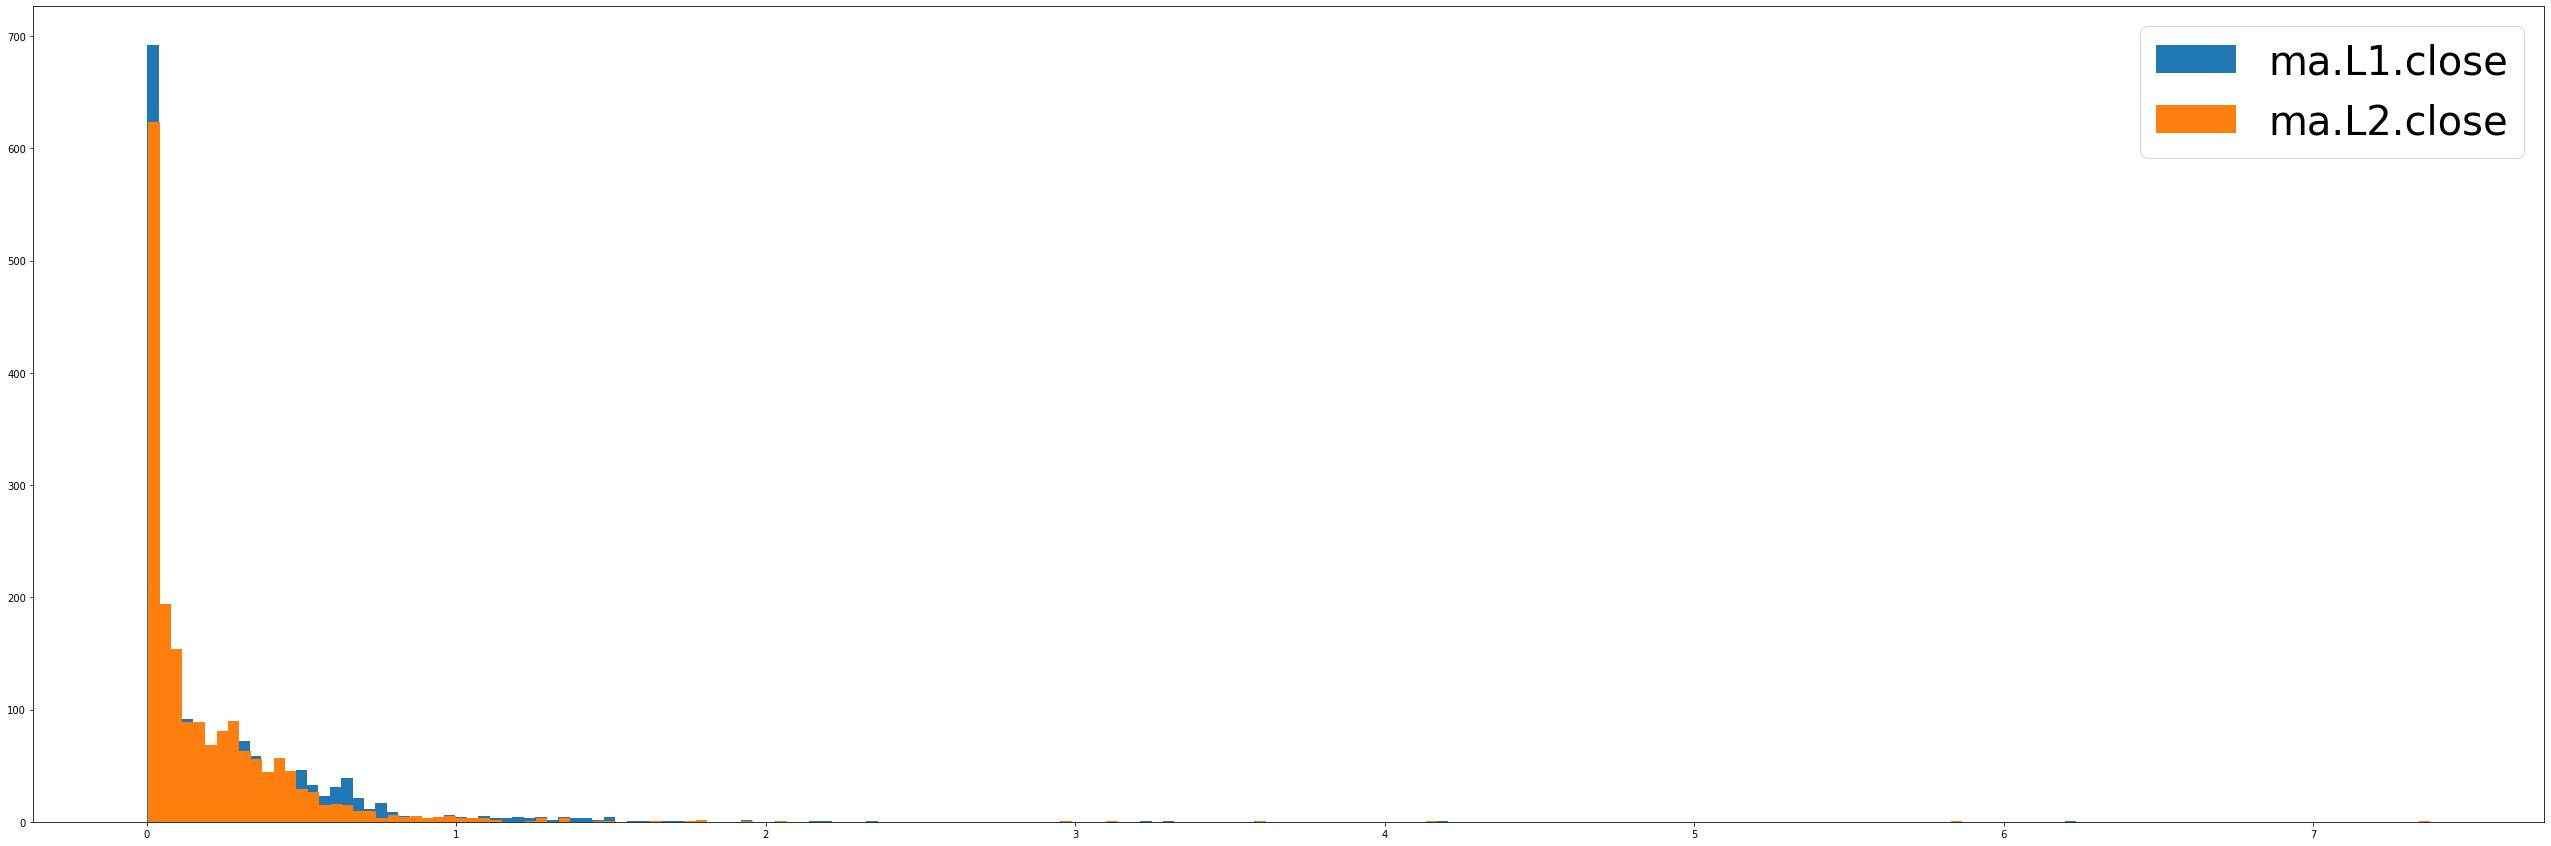

In [15]:
plt.figure(figsize=(45,15))

for i in range(1,3):
    plt.hist(metadata_df[f'ar.L{i}.close'],bins=200)

plt.legend(['ar.L1.close','ar.L2.close'],fontsize=40)

plt.show()

plt.figure(figsize=(45,15))

for i in range(1,3):
    plt.hist(metadata_df[f'ma.L{i}.close'],bins=200)
    
plt.legend(['ma.L1.close','ma.L2.close'],fontsize=40)

plt.show()